# Đồ án cuối kỳ môn học máy
* Họ và tên: **Trần Vĩ Khang** – Mã số sinh viên: **521000899**
* Họ và tên: **Trần Tống Gia Vũ** - Mã số sinh viên: **52000733**

In [1]:
import gdown
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten, BatchNormalization, Masking
from tensorflow.keras.utils import to_categorical
import warnings

In [2]:
# warnings.filterwarnings('ignore')

In [3]:
google_drive_link = 'https://drive.google.com/uc?id=1b4jiOggXtfAhY4MFUX-eIQ9wvCVJYDJT'
output_file = 'Sleep_health_and_lifestyle_dataset.csv'
gdown.download(google_drive_link, output_file, quiet=False)
df = pd.read_csv(output_file)

Downloading...
From: https://drive.google.com/uc?id=1b4jiOggXtfAhY4MFUX-eIQ9wvCVJYDJT
To: /content/Sleep_health_and_lifestyle_dataset.csv
100%|██████████| 24.1k/24.1k [00:00<00:00, 14.3MB/s]


In [4]:
df.head(10)

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   
5          6   Male   28     Software Engineer             5.9   
6          7   Male   29               Teacher             6.3   
7          8   Male   29                Doctor             7.8   
8          9   Male   29                Doctor             7.8   
9         10   Male   29                Doctor             7.8   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   
5                 4                       30             8        Obese   
6                 6                       40             7        Obese   
7                 7                       75             6       Normal   
8                 7                       75             6       Normal   
9                 7                       75             6       Normal   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200           None  
1         125/80          75        10000           None  
2         125/80          75        10000           None  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea  
5         140/90          85         3000       Insomnia  
6         140/90          82         3500       Insomnia  
7         120/80          70         8000           None  
8         120/80          70         8000           None  
9         120/80          70         8000           None

In [5]:
df.describe()

Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000      4.000000   68.000000   5600.000000  
50%                  60.000000      5.000000   70.000000   7000.000000  
75%                  75.000000      7.000000   72.000000   8000.000000  
max                  90.000000      8.000000   86.000000  10000.000000

# 1. Tiền xử lý dữ liệu

* Kiểm tra dữ liệu có dòng nào bị lặp

In [6]:
df.duplicated().sum()

0

* Kiểm tra có bị thiếu giá trị (hoặc NaN) không?

In [7]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [8]:
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [10]:
df.drop('Person ID', axis = 1, inplace = True)

In [11]:
df.head(5)

Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0   Male   27     Software Engineer             6.1                 6   
1   Male   28                Doctor             6.2                 6   
2   Male   28                Doctor             6.2                 6   
3   Male   28  Sales Representative             5.9                 4   
4   Male   28  Sales Representative             5.9                 4   

   Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0                       42             6   Overweight         126/83   
1                       60             8       Normal         125/80   
2                       60             8       Normal         125/80   
3                       30             8        Obese         140/90   
4                       30             8        Obese         140/90   

   Heart Rate  Daily Steps Sleep Disorder  
0          77         4200           None  
1          75        10000           None  
2          75        10000           None  
3          85         3000    Sleep Apnea  
4          85         3000    Sleep Apnea

# 2. Trực quan hóa dữ liệu

In [12]:
# Check numerical data types
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
#  Check object data types
object_columns = df.select_dtypes(include=['object']).columns

In [13]:
fig = go.Figure(data=[go.Bar(x=df['Sleep Disorder'].value_counts().index,
                             y=df['Sleep Disorder'].value_counts())])
fig.update_layout(
 title= 'Sleep Disorder',
 xaxis_title="Sleep Disorder",
 yaxis_title="Count"
 )
fig.show()

In [14]:
fig = go.Figure(data=[go.Pie(labels=df['Sleep Disorder'].value_counts().index,
                             values=df['Sleep Disorder'].value_counts())])
fig.update_layout(title= 'Sleep Disorder')
fig.show()

In [15]:
df['Gender'].value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

In [16]:
fig = go.Figure(data = [go.Bar(x = df['Gender'].value_counts().index,
                              y = df['Gender'].value_counts())])
fig.update_layout(
    title = 'Gender',
    xaxis_title = 'Gender',
    yaxis_title = 'Count'
)
fig.show()

In [17]:
counts = df['Gender'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title= 'Gender')
fig.show()

In [18]:
df['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [19]:
fig = go.Figure(data=[go.Bar(x=df['Occupation'].value_counts().index, y=df['Occupation'].value_counts())])
fig.update_layout(
 title= 'Occupation',
 xaxis_title="Occupation",
 yaxis_title="Count"
 )
fig.show()

In [20]:
counts = df['Occupation'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title= 'Occupation')
fig.show()

In [21]:
df['BMI Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

In [22]:
fig = go.Figure(data=[go.Bar(x=df['BMI Category'].value_counts().index, y=df['BMI Category'].value_counts())])
fig.update_layout(
 title= 'BMI Category',
 xaxis_title="BMI Category",
 yaxis_title="Count"
 )
fig.show()

* Stress Level by Gender

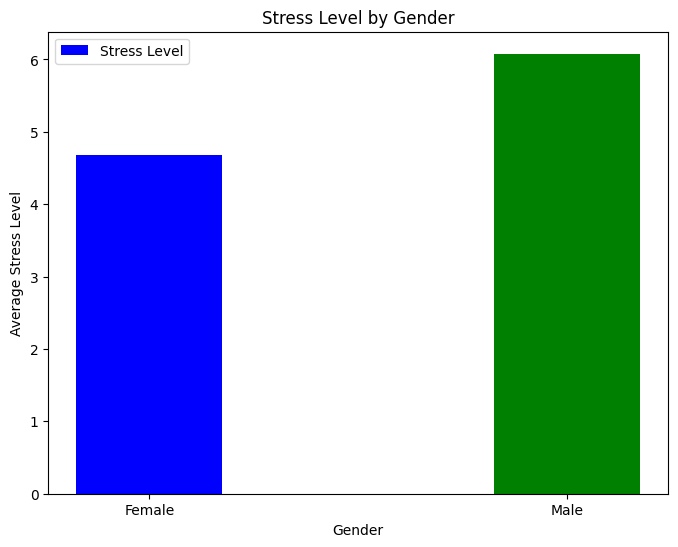

In [23]:
gender_stress = df.groupby('Gender')['Stress Level'].mean()
x = np.arange(len(gender_stress))
width = 0.35
plt.figure(figsize=(8, 6))
plt.bar(x, gender_stress, width, label='Stress Level', color=['blue', 'green'])
plt.xlabel('Gender')
plt.ylabel('Average Stress Level')
plt.title('Stress Level by Gender')
plt.xticks(x, gender_stress.index)
plt.legend()
plt.show()

* Occupation vs Daily steps taken

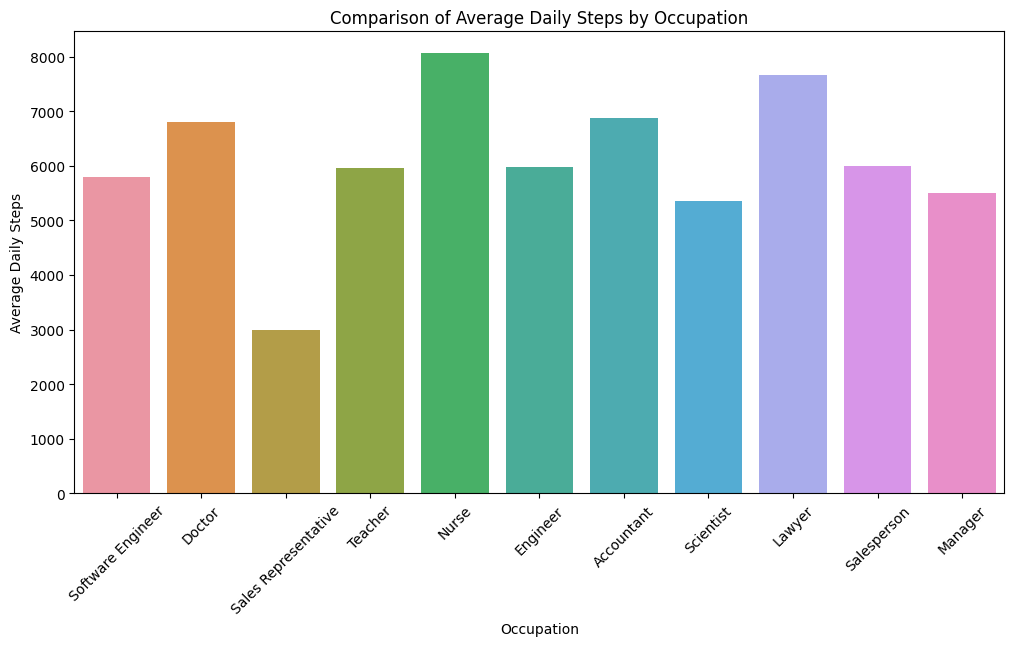

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Occupation", y="Daily Steps", data=df, errorbar=None)
plt.title("Comparison of Average Daily Steps by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Daily Steps")
plt.xticks(rotation=45)
plt.show()

* Visualize blood pressure trends by age

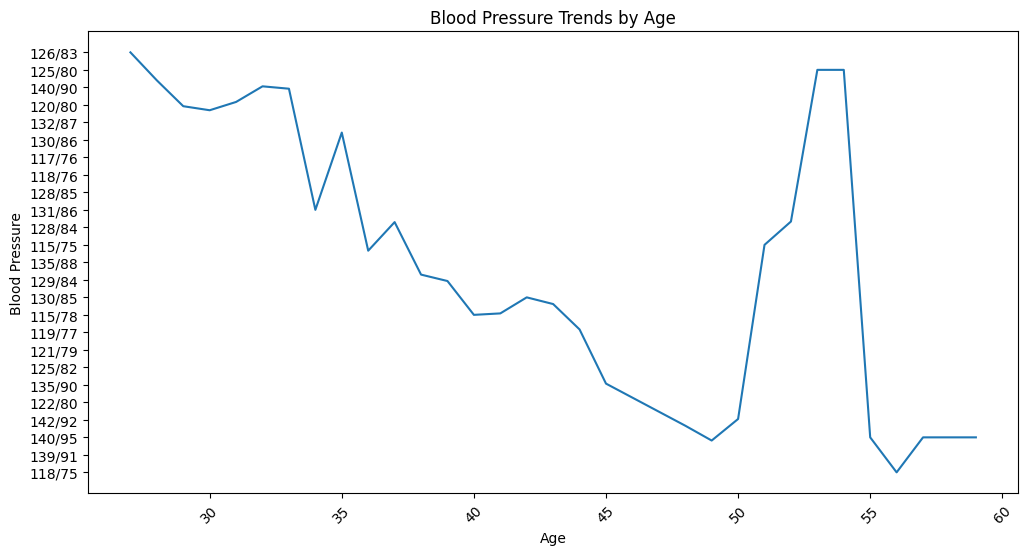

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Age", y="Blood Pressure", data=df, errorbar=None)
plt.title("Blood Pressure Trends by Age")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.xticks(rotation=45)
plt.show()

* BMI Category Distribution

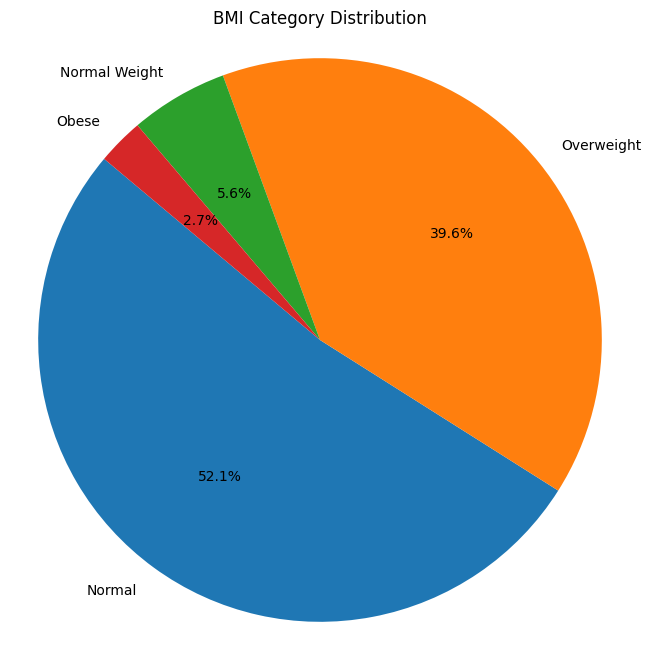

In [26]:
bmi_counts = df['BMI Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("BMI Category Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

In [27]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

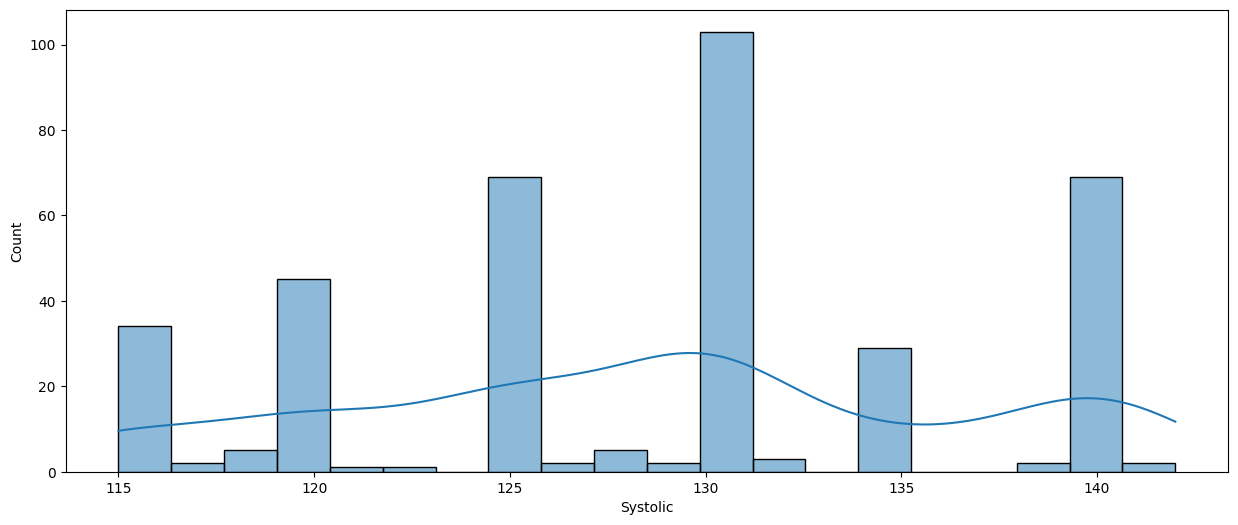

In [28]:
plt.figure(figsize=(15,6))
sns.histplot(df['Systolic'], kde = True, bins = 20)
plt.xticks(rotation = 0)
plt.show()

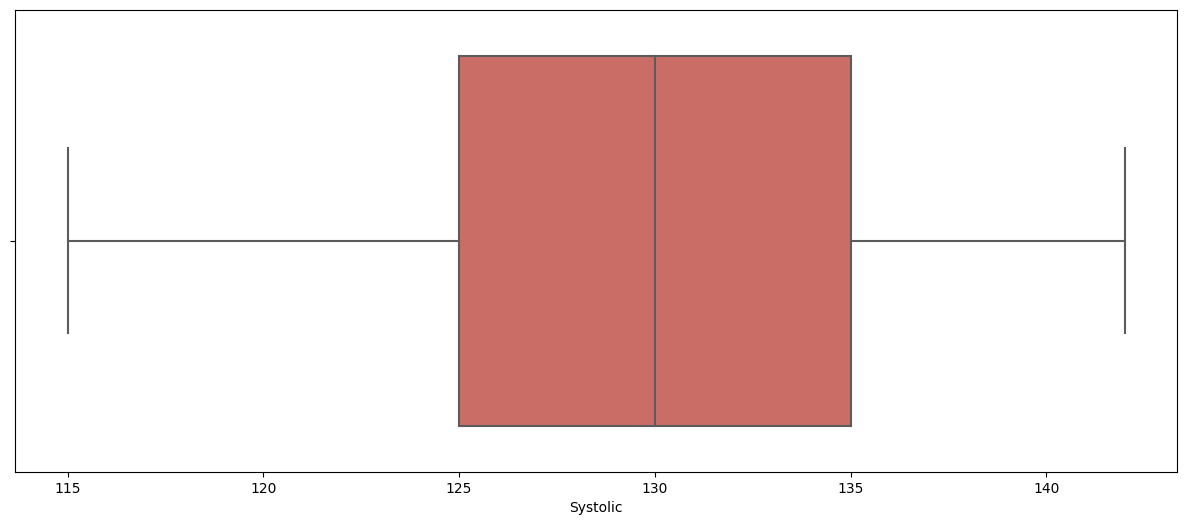

In [29]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'Systolic', data=df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

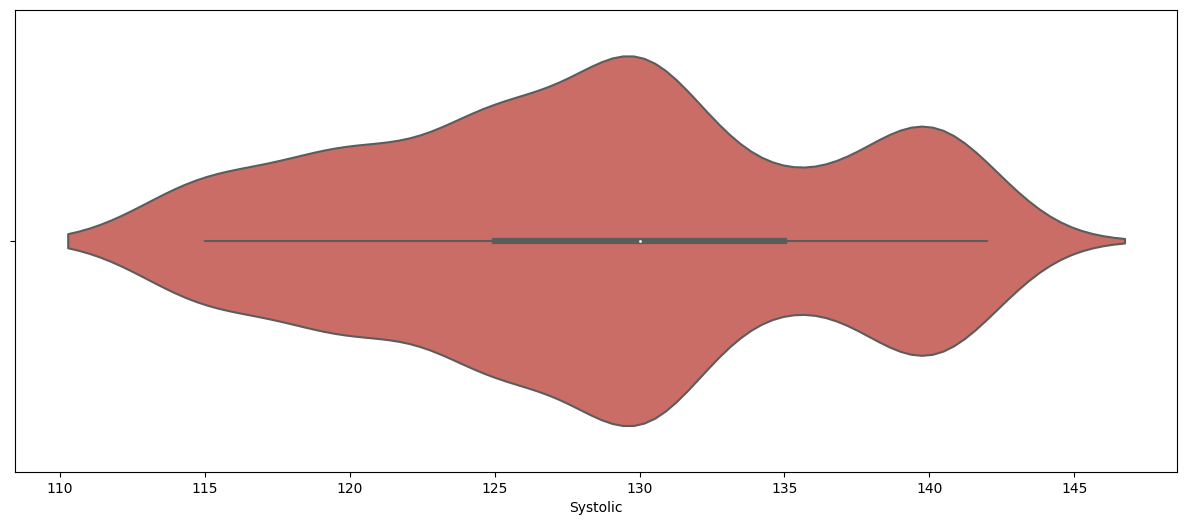

In [30]:
plt.figure(figsize=(15,6))
sns.violinplot(x = 'Systolic', data=df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

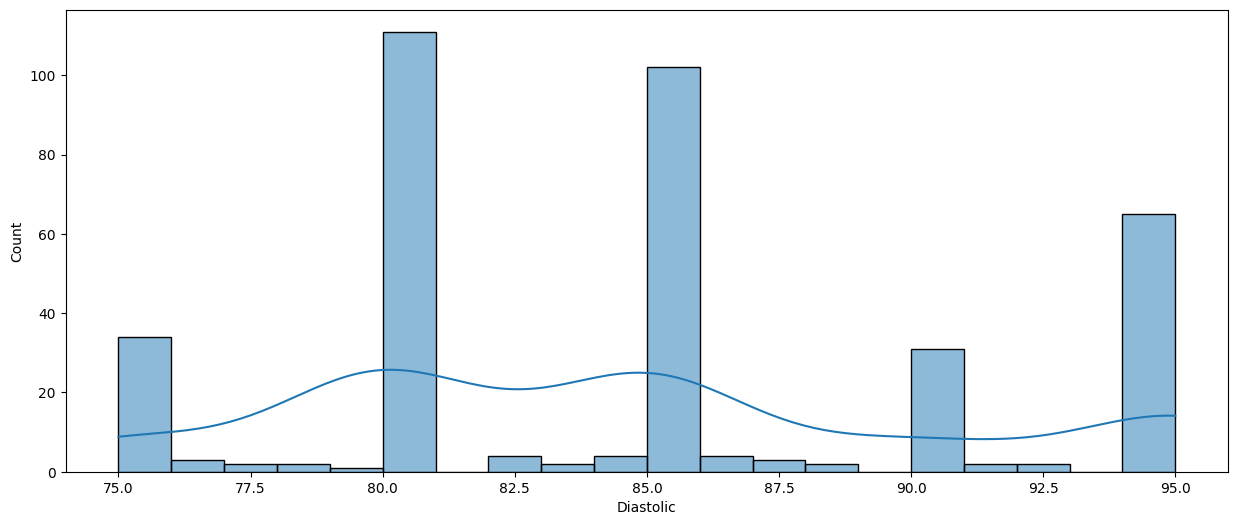

In [31]:
plt.figure(figsize=(15,6))
sns.histplot(df['Diastolic'], kde = True, bins = 20)
plt.xticks(rotation = 0)
plt.show()

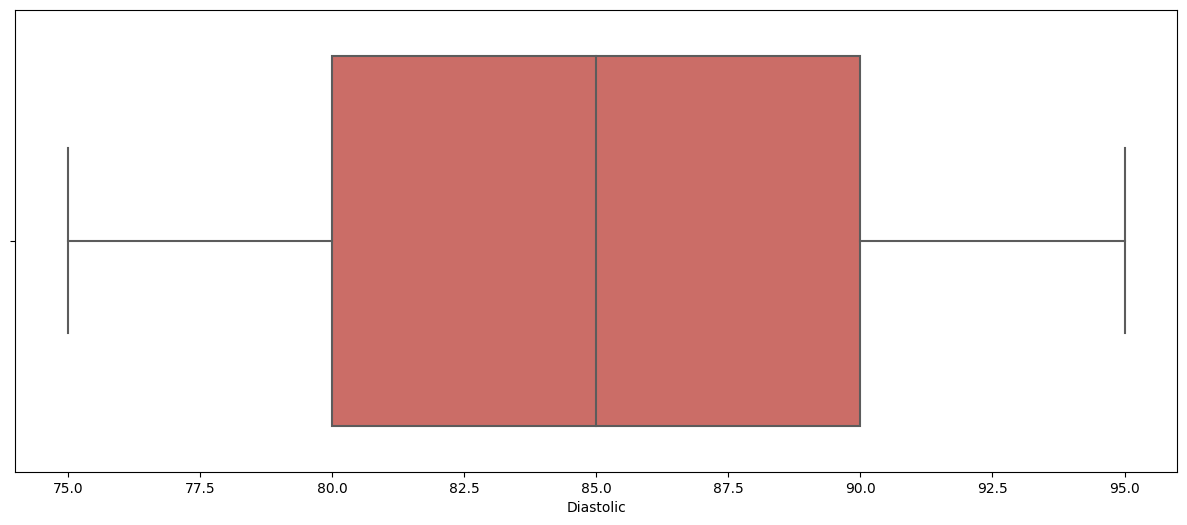

In [32]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'Diastolic', data=df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

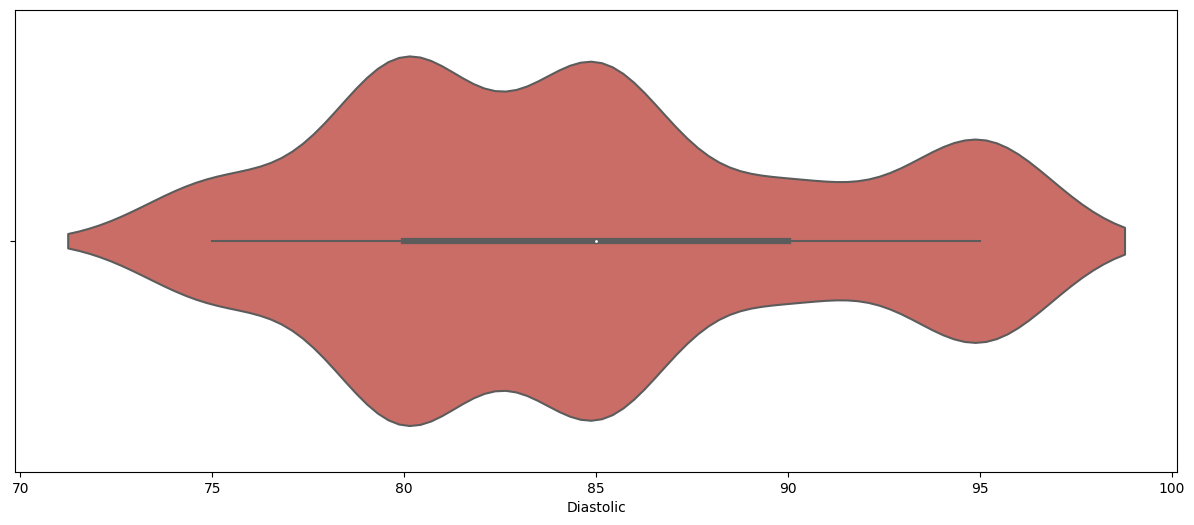

In [33]:
plt.figure(figsize=(15,6))
sns.violinplot(x = 'Diastolic', data=df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

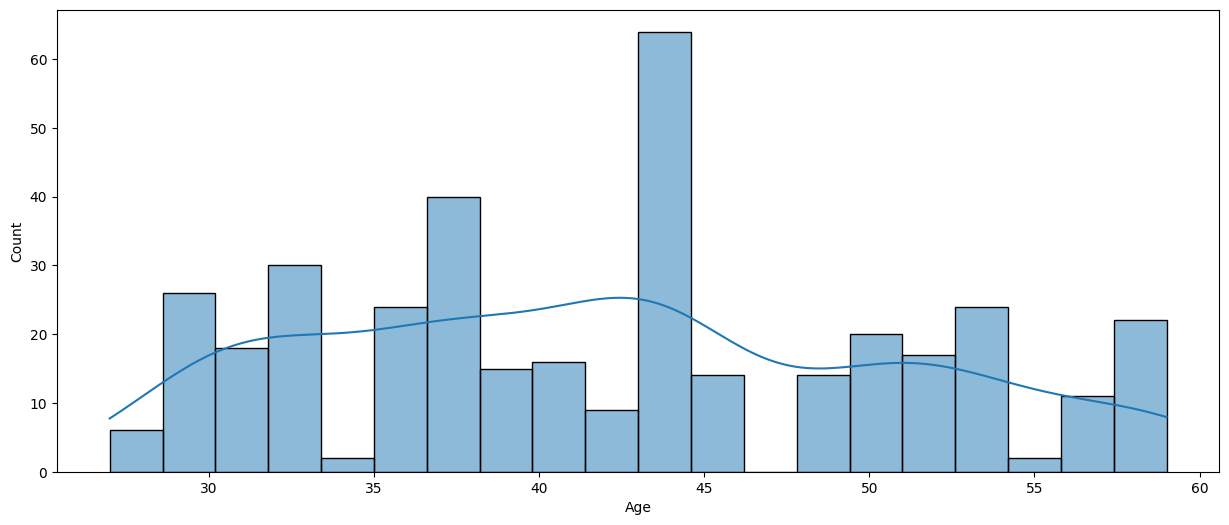

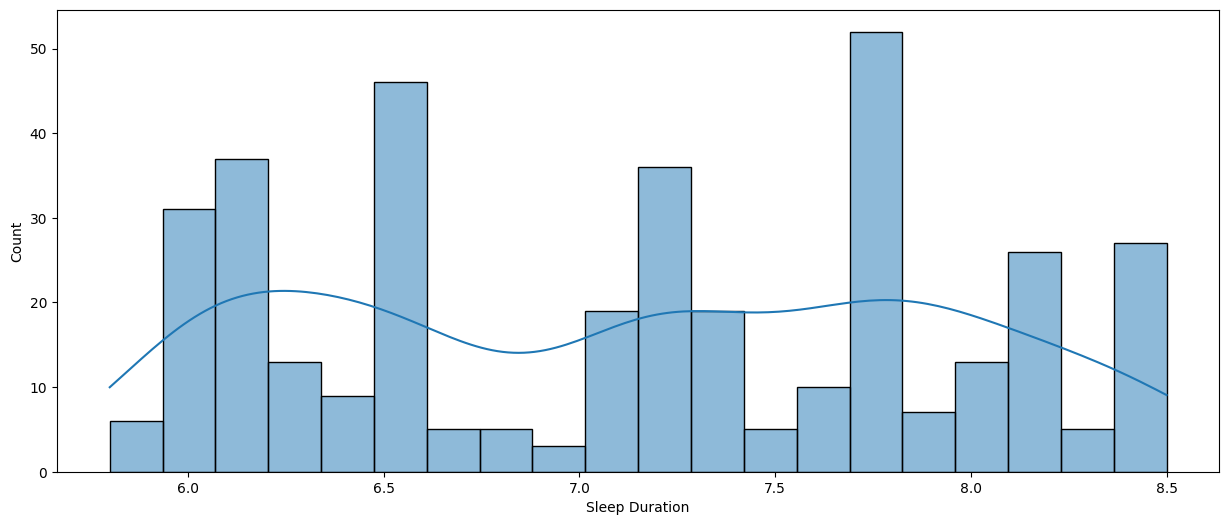

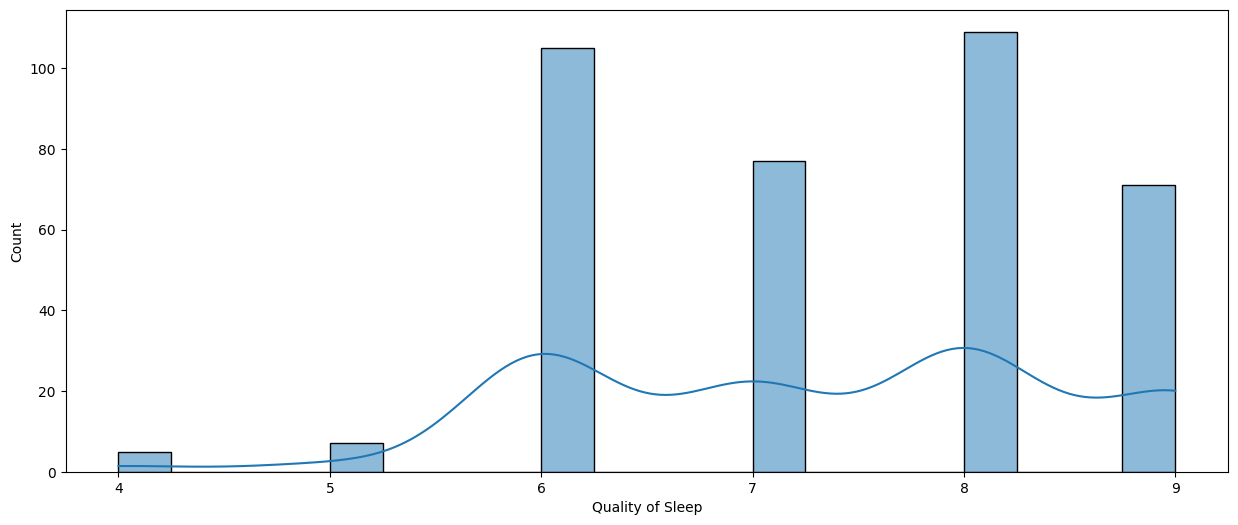

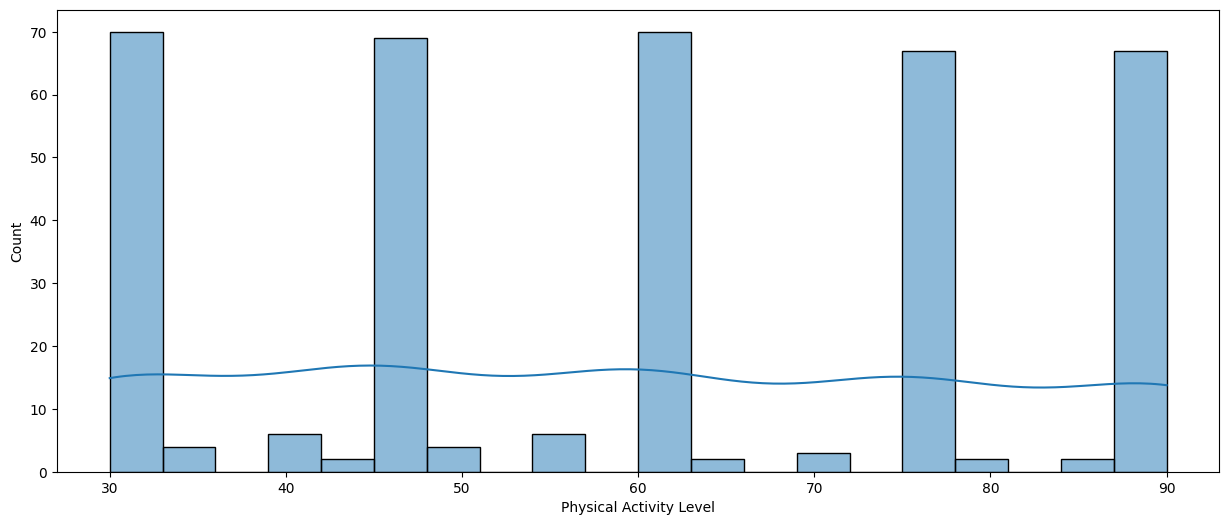

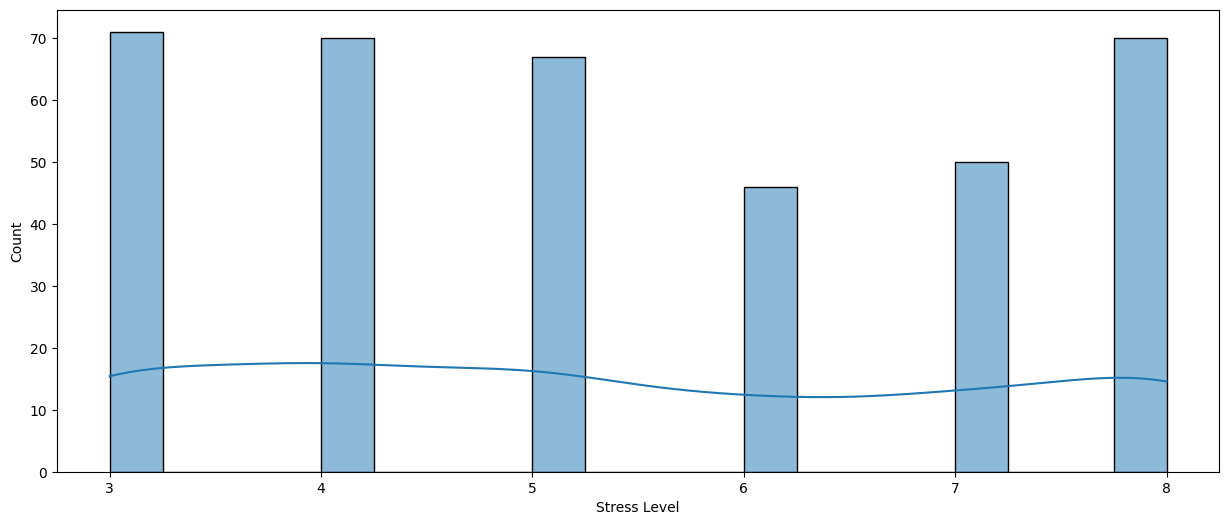

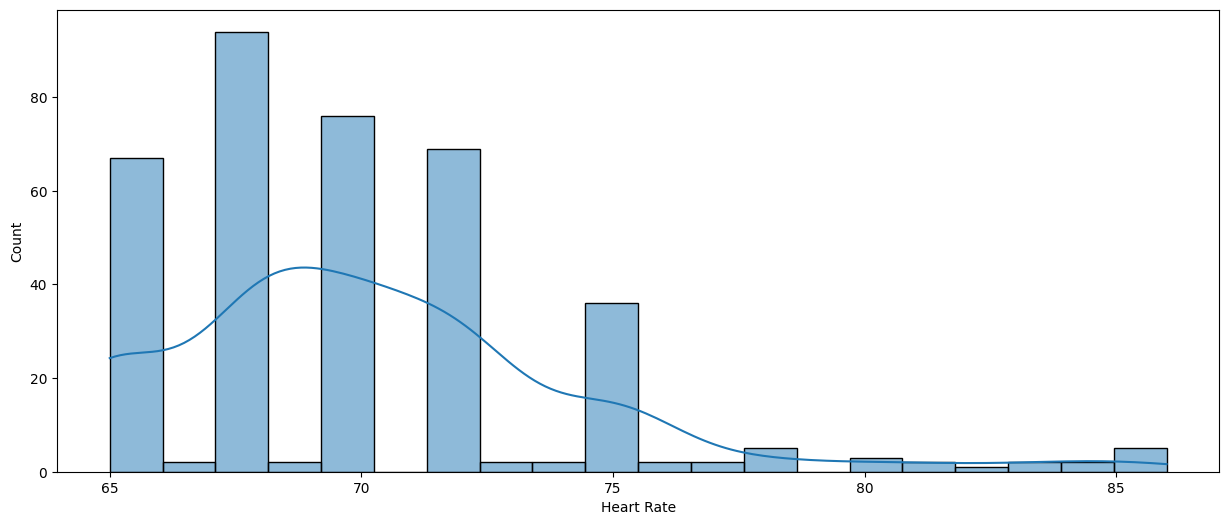

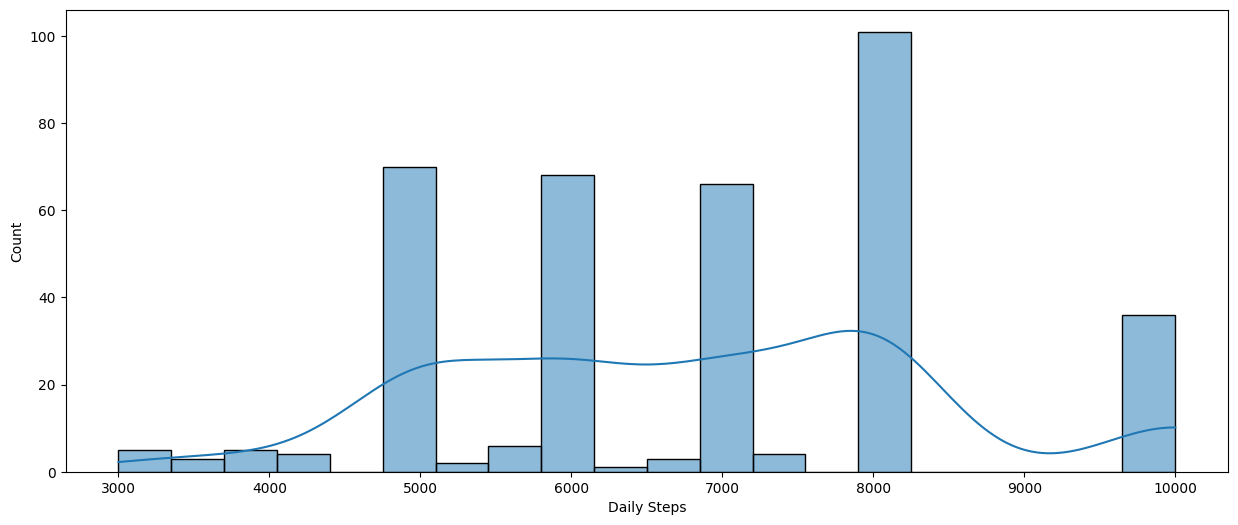

In [34]:
for i in numerical_columns:
    if i != 'Person ID':
        plt.figure(figsize=(15,6))
        sns.histplot(df[i], kde = True, bins = 20)
        plt.xticks(rotation = 0)
        plt.show()

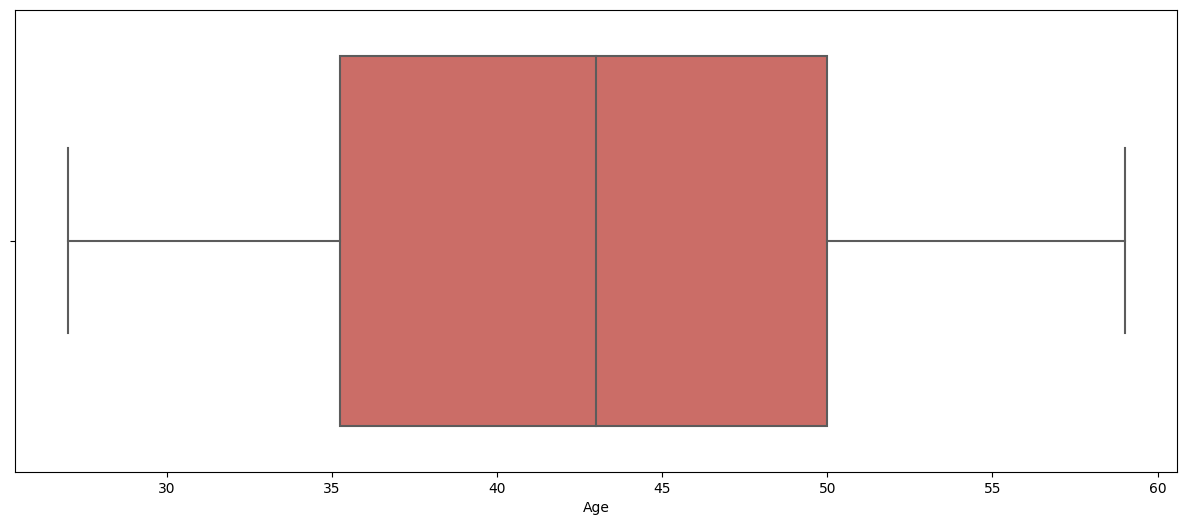

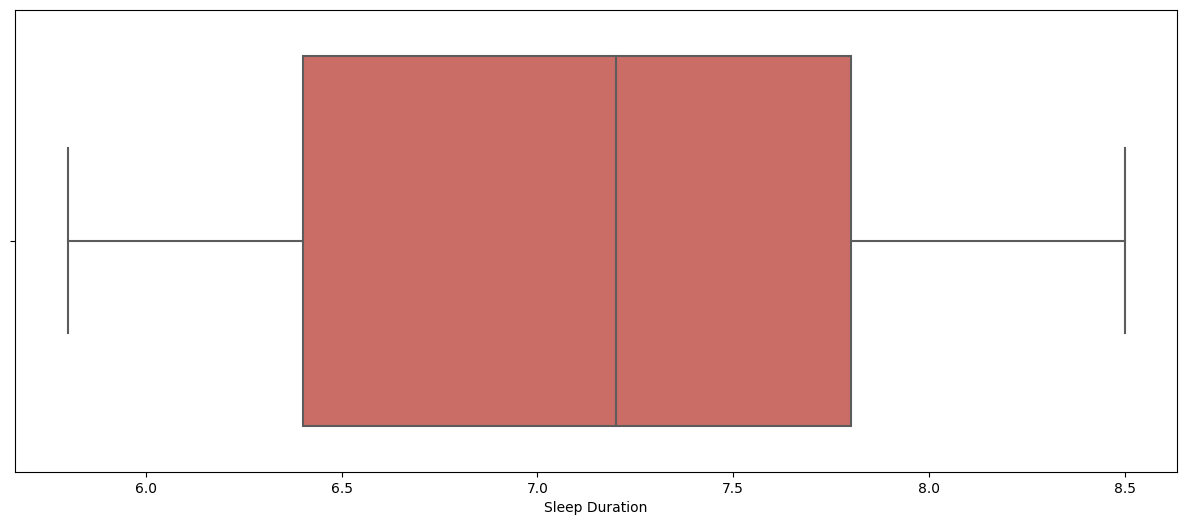

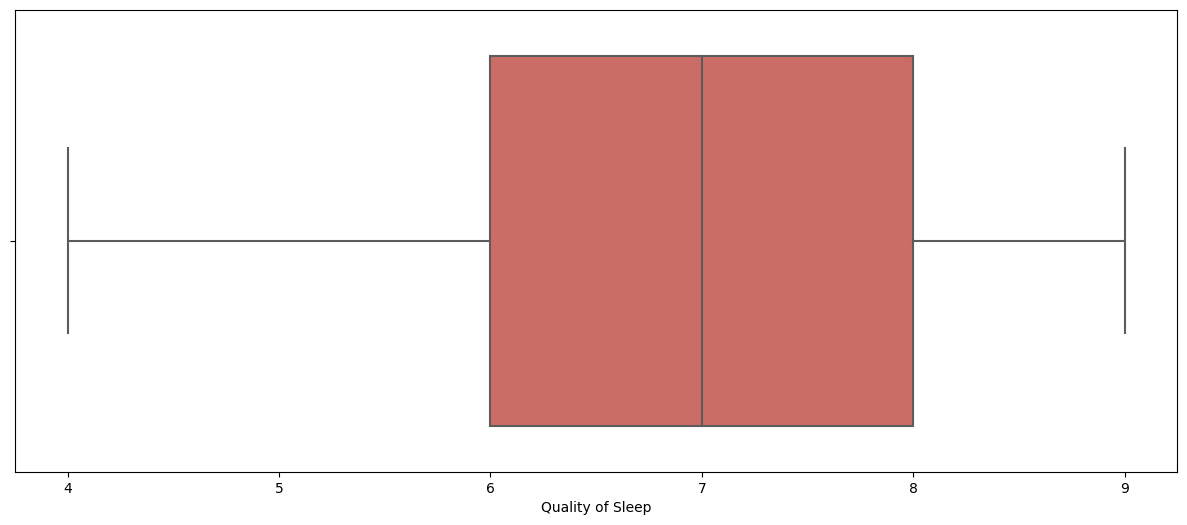

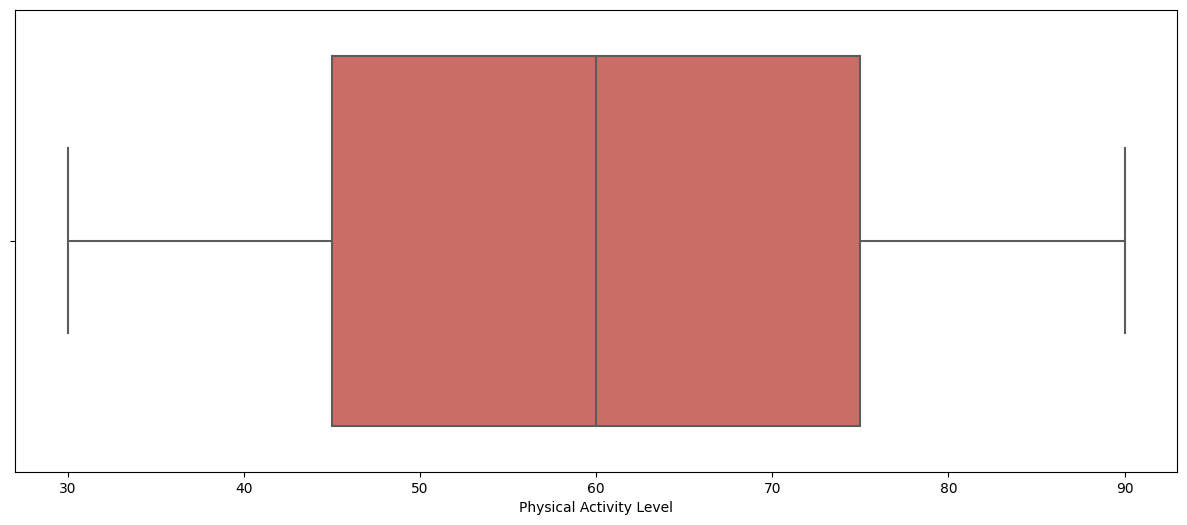

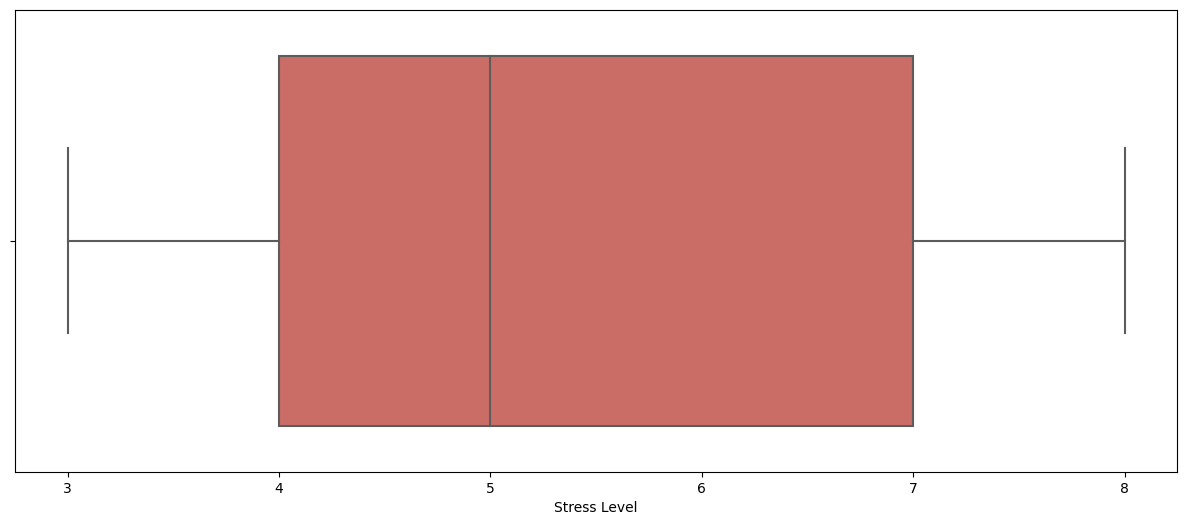

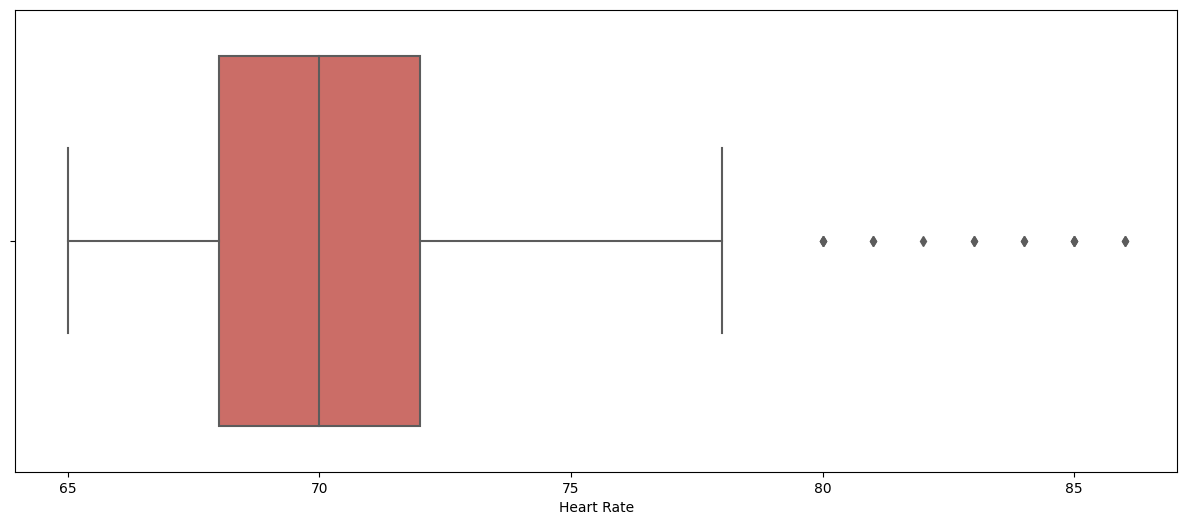

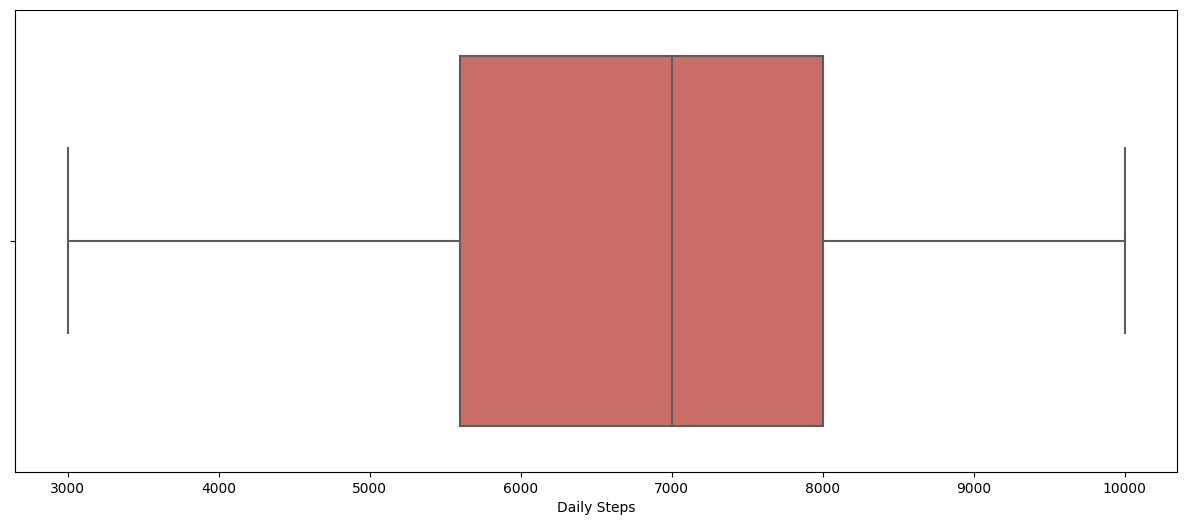

In [35]:
for i in numerical_columns:
    if i != 'Person ID':
        plt.figure(figsize=(15,6))
        sns.boxplot(x = i, data = df, palette = 'hls')
        plt.xticks(rotation = 0)
        plt.show()

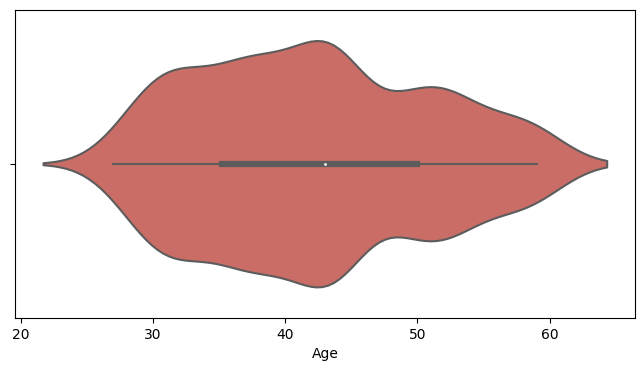

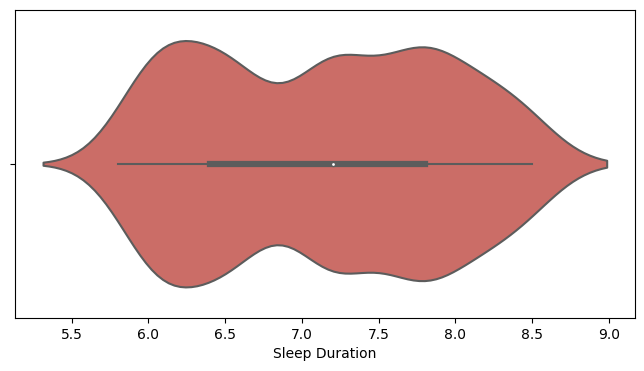

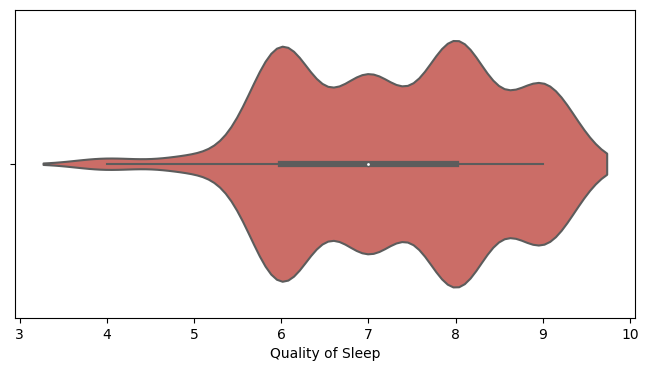

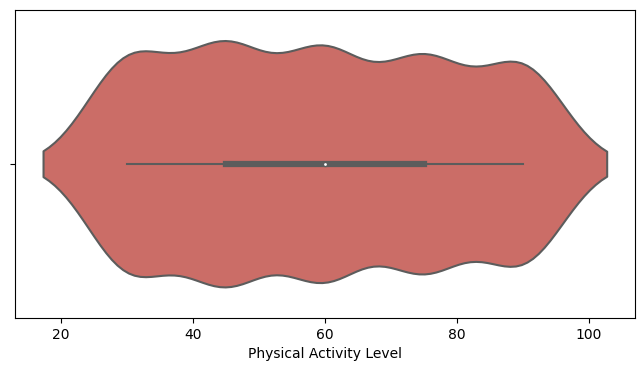

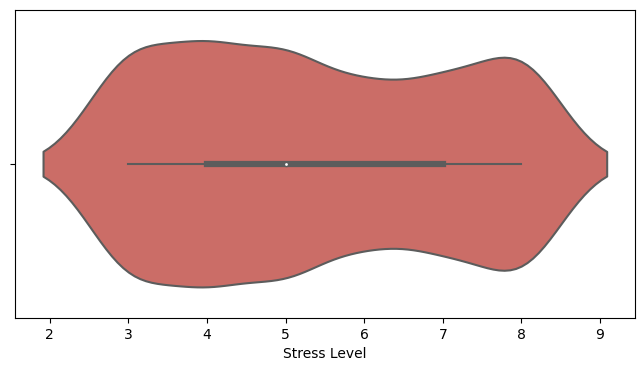

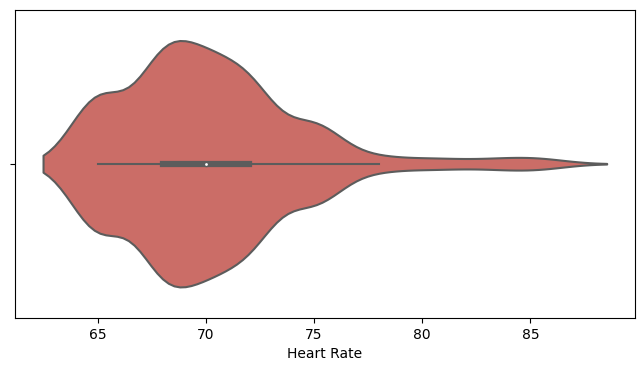

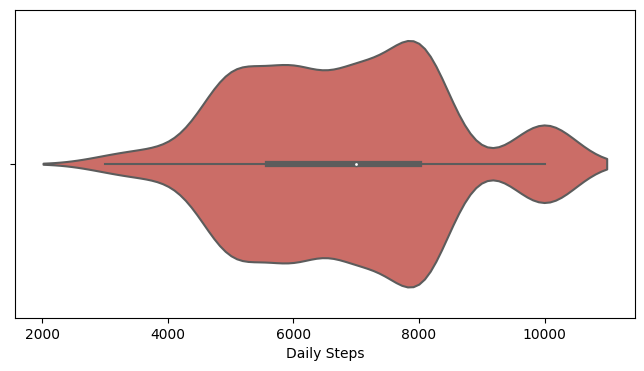

In [36]:
for i in numerical_columns:
    if i != 'Person ID':
        plt.figure(figsize=(8,4))
        sns.violinplot(x = i, data = df, palette = 'hls')
        plt.xticks(rotation = 0)
        plt.show()

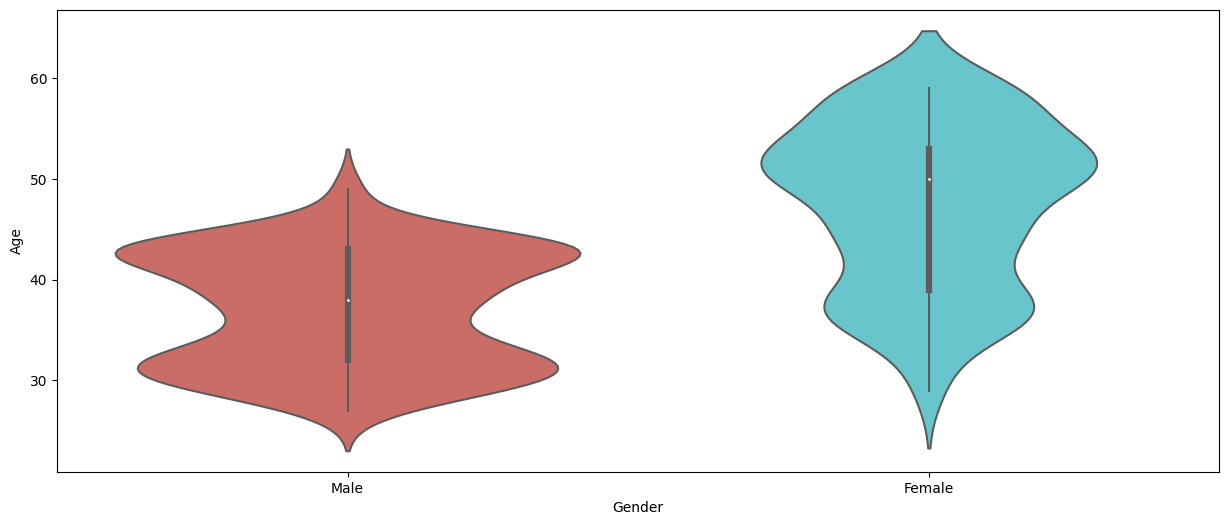

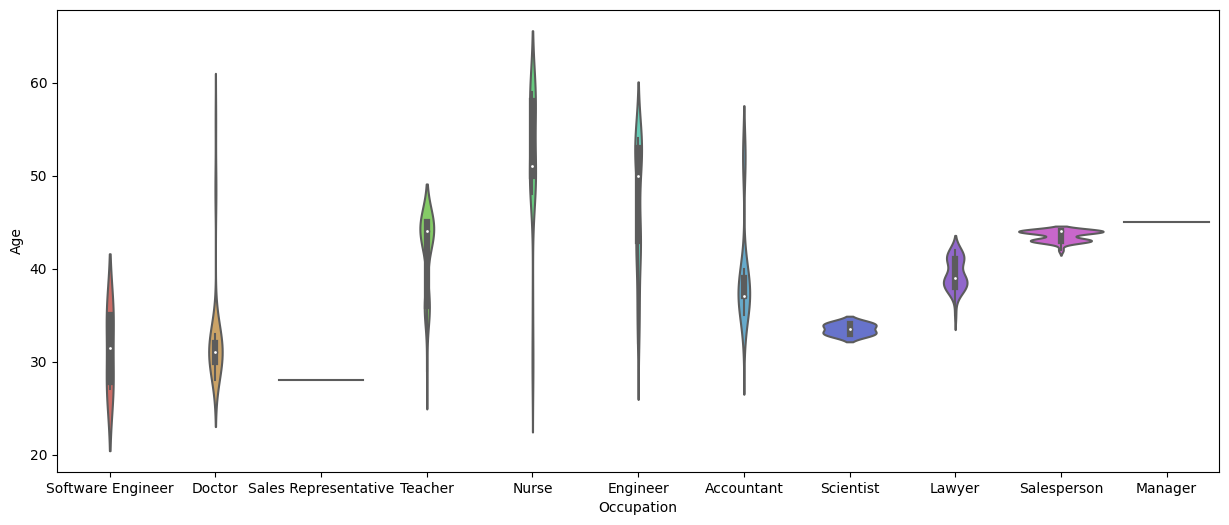

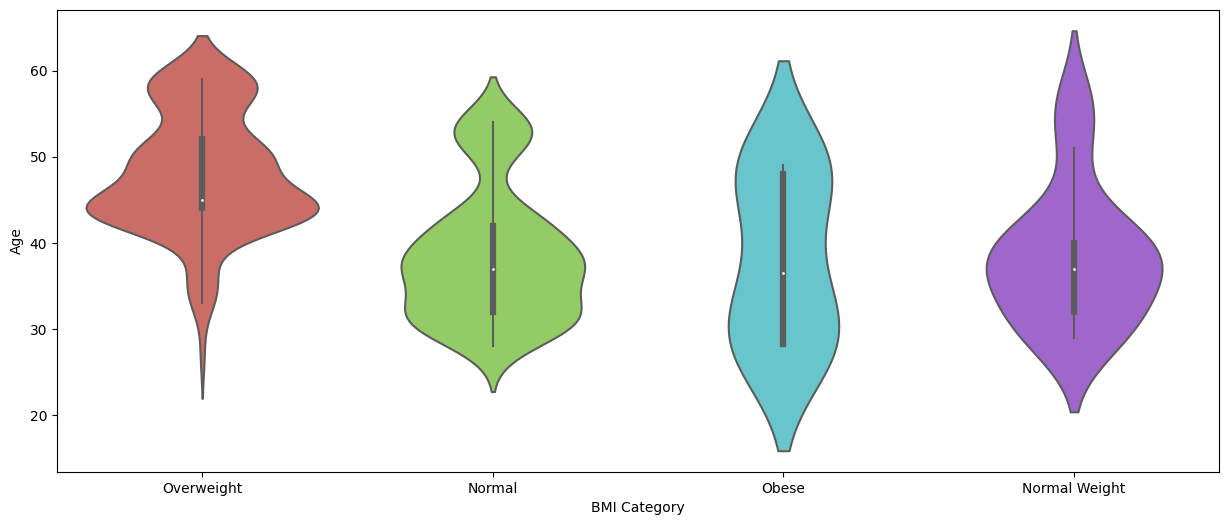

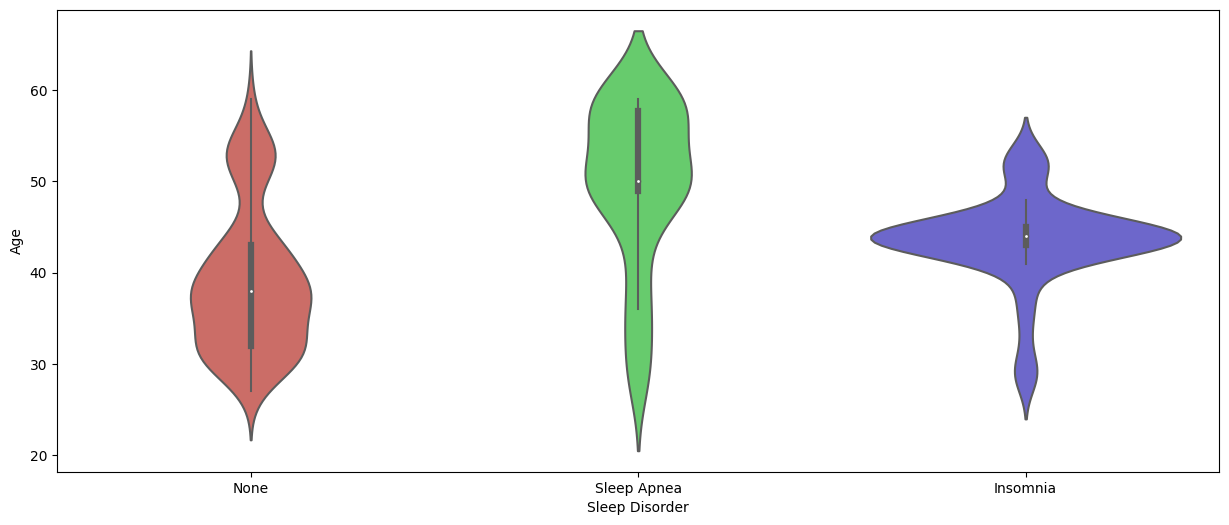

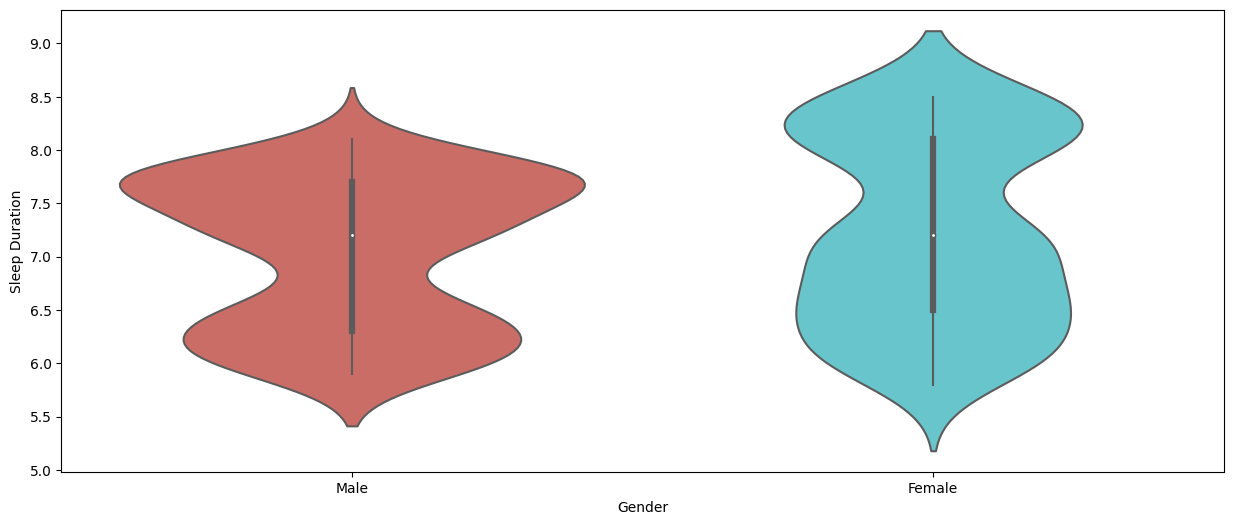

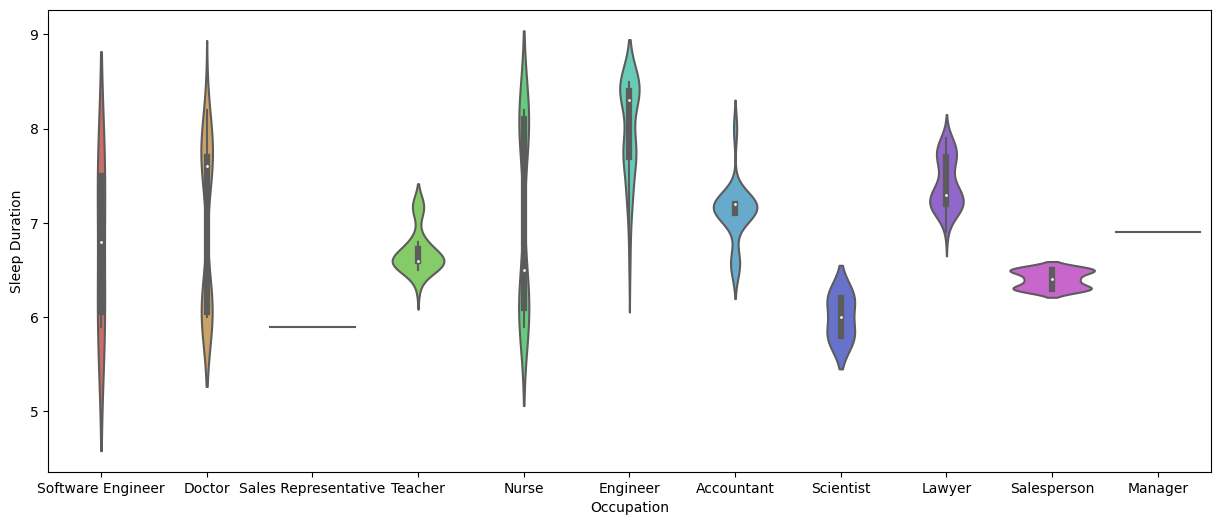

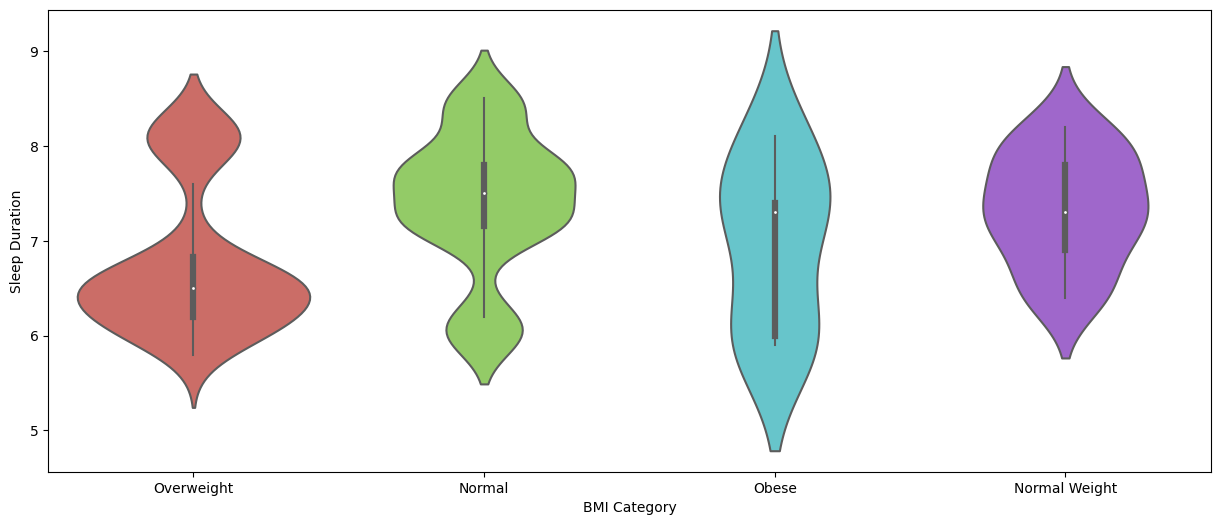

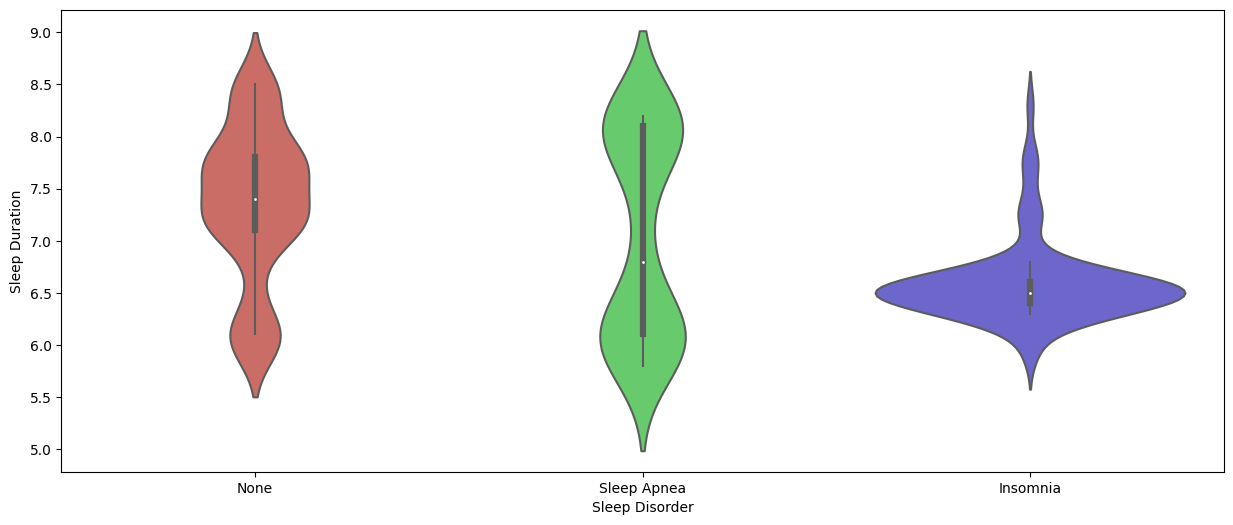

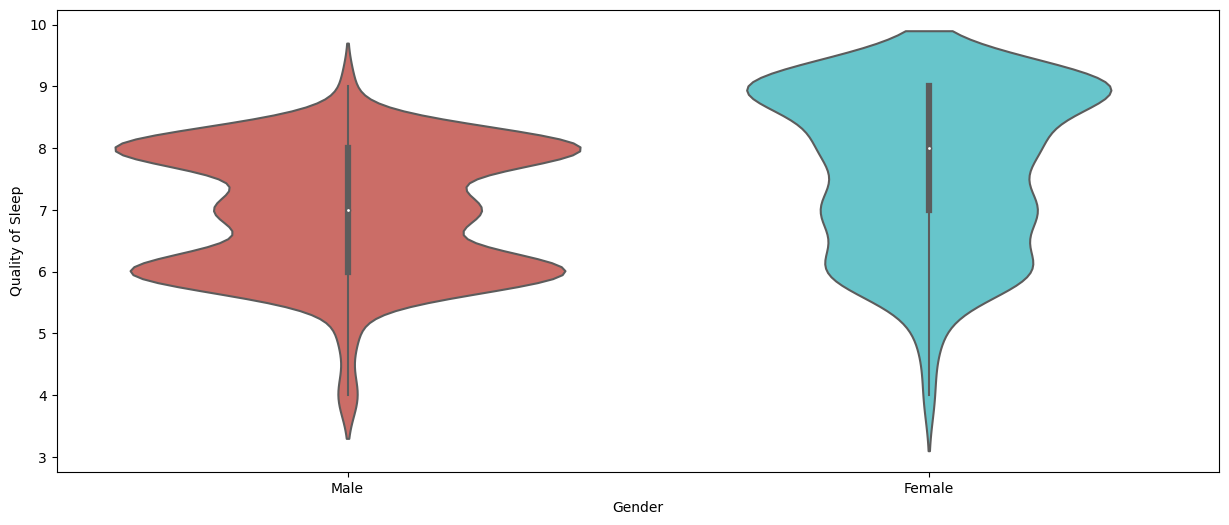

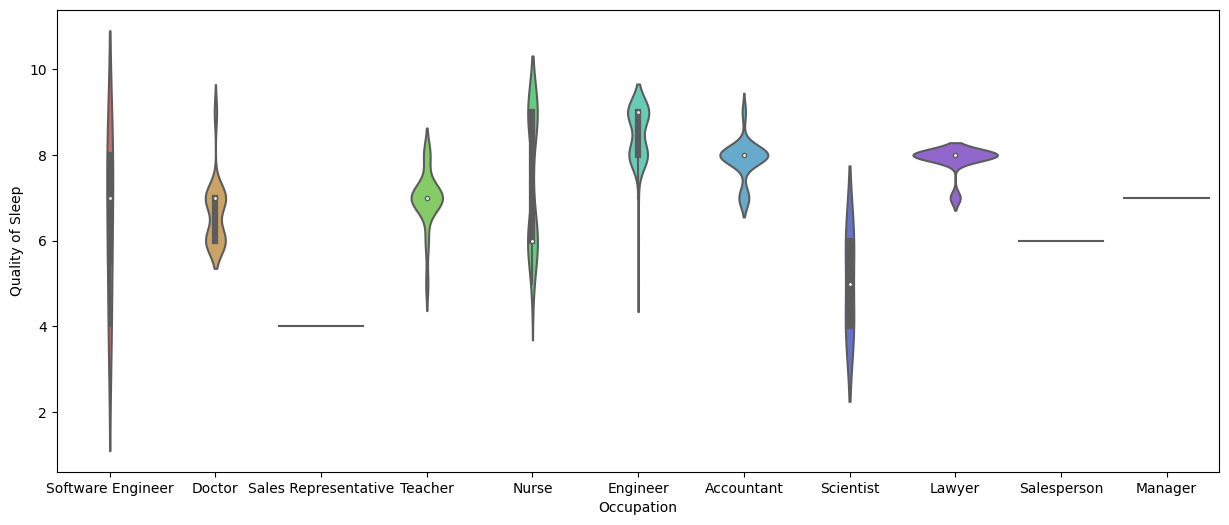

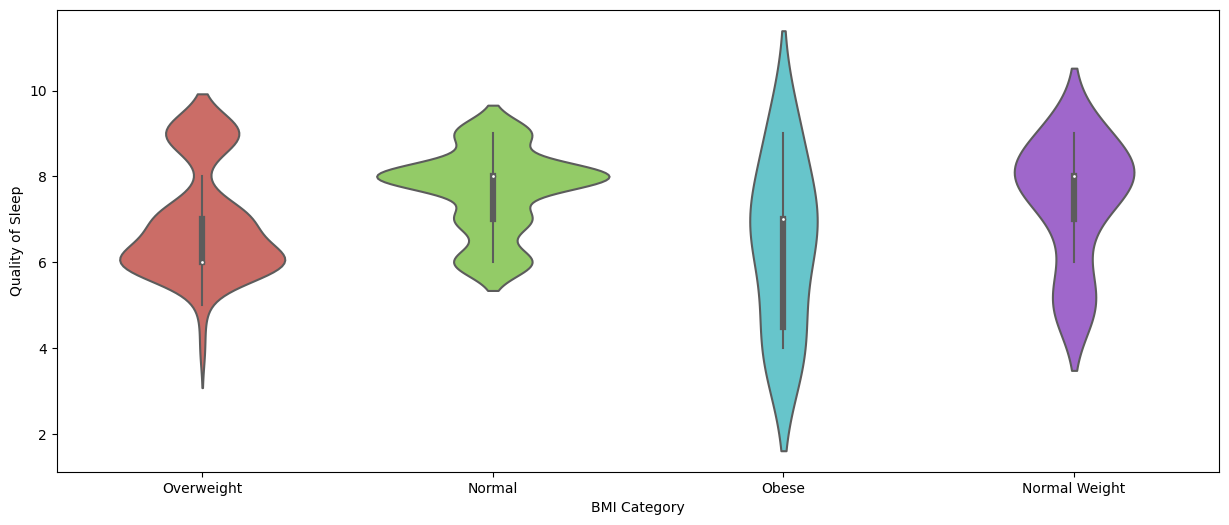

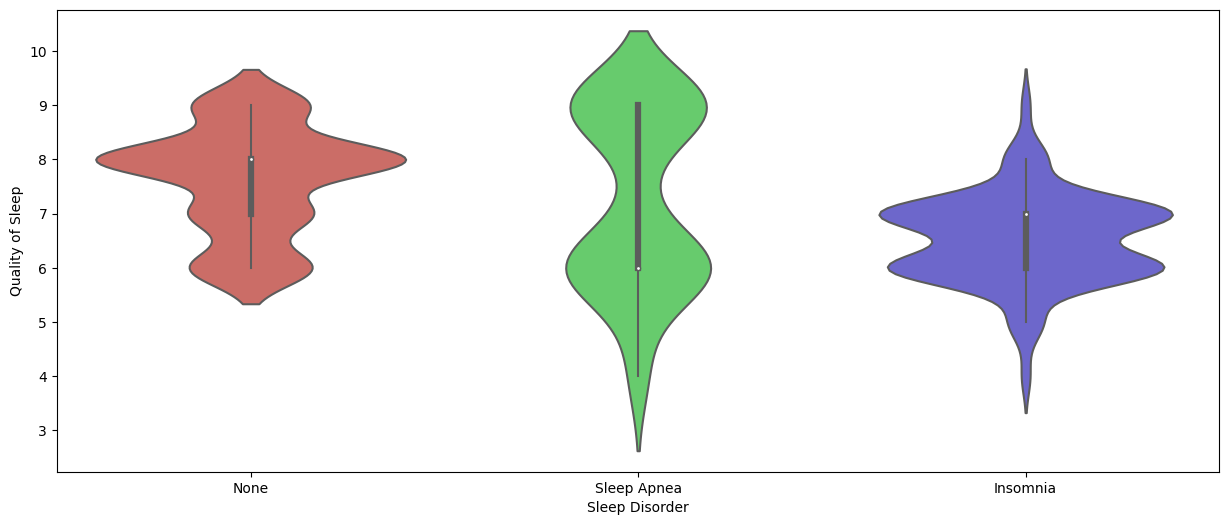

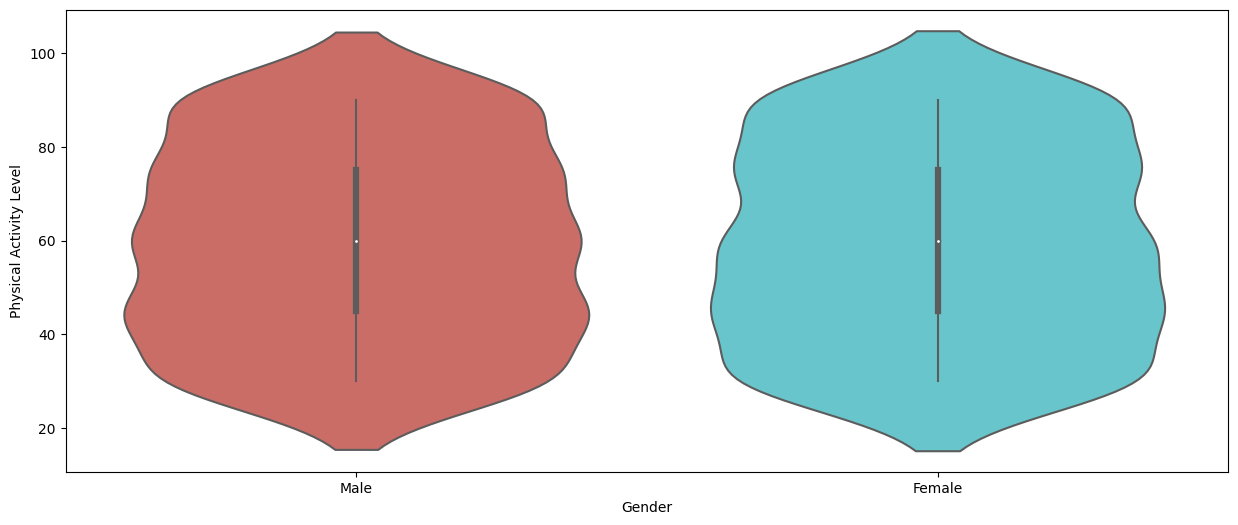

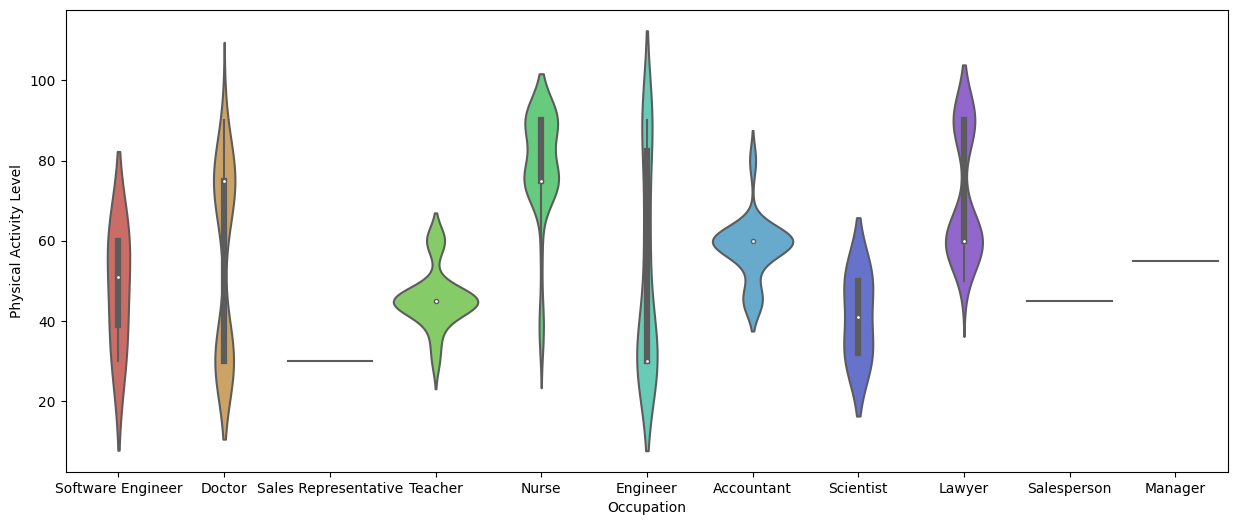

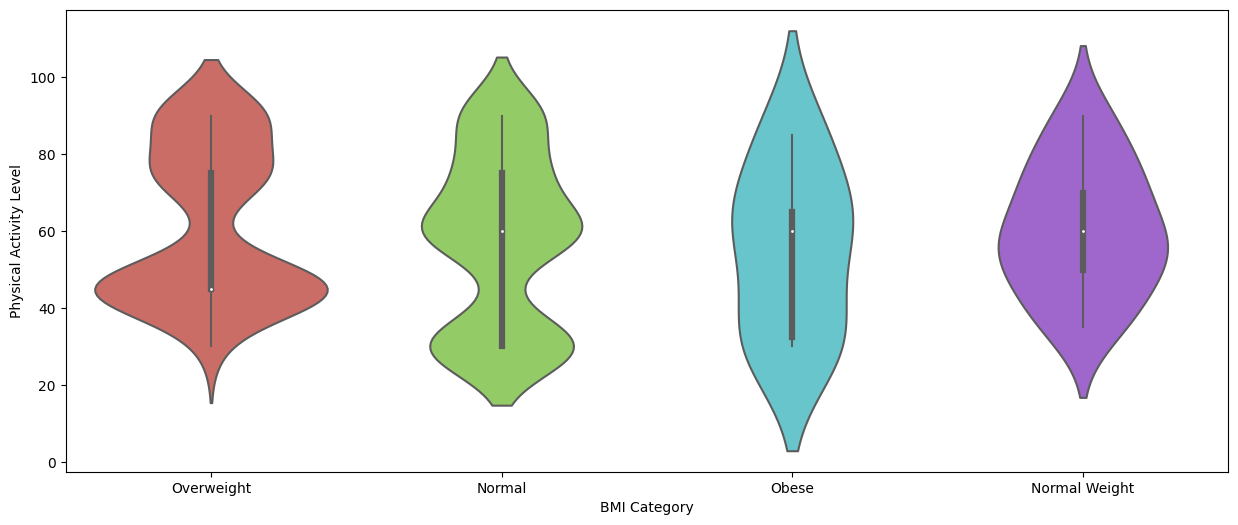

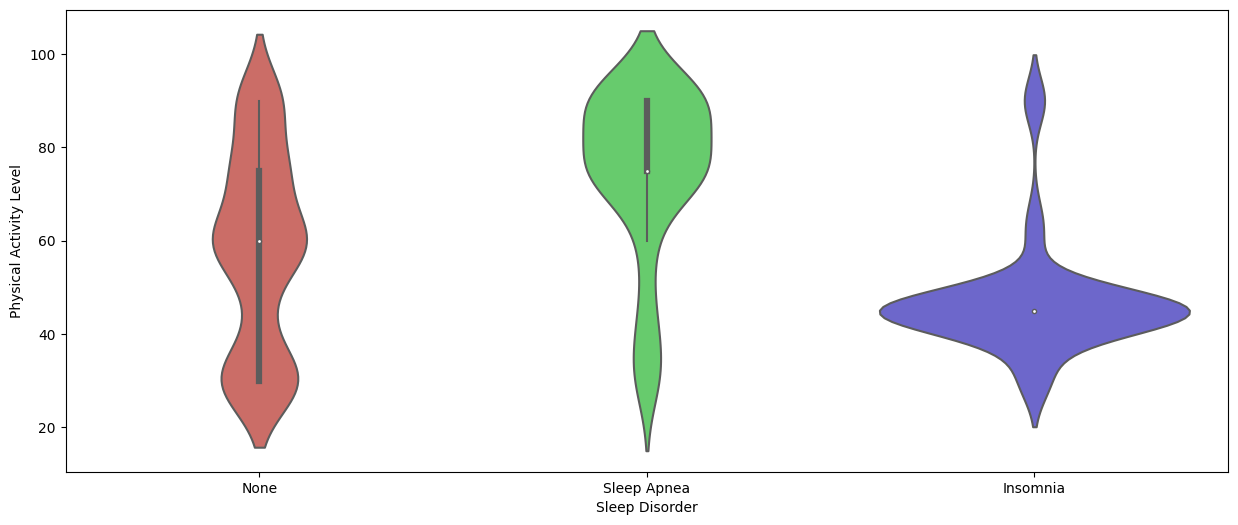

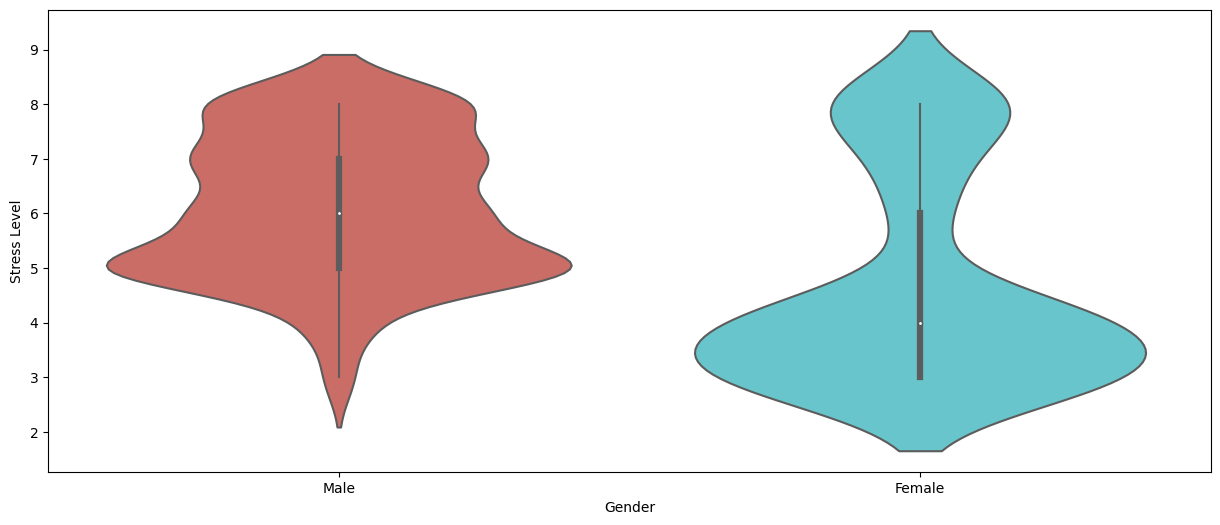

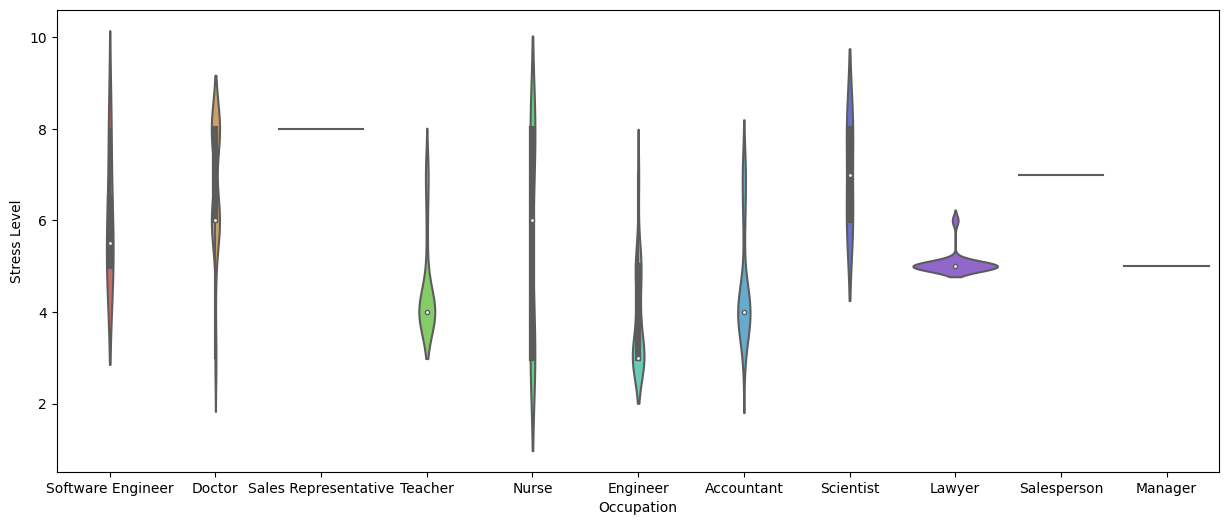

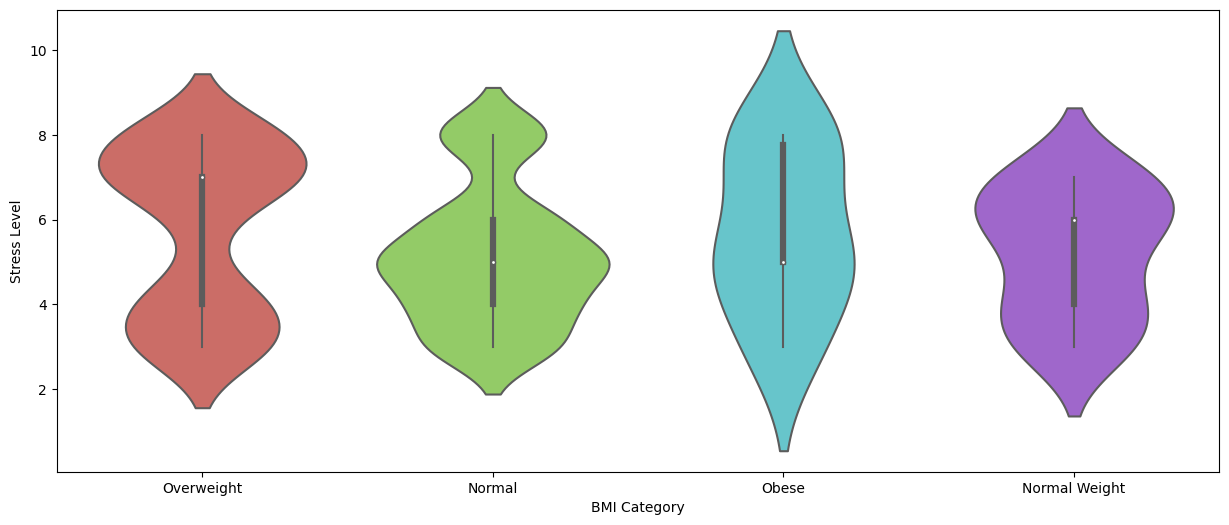

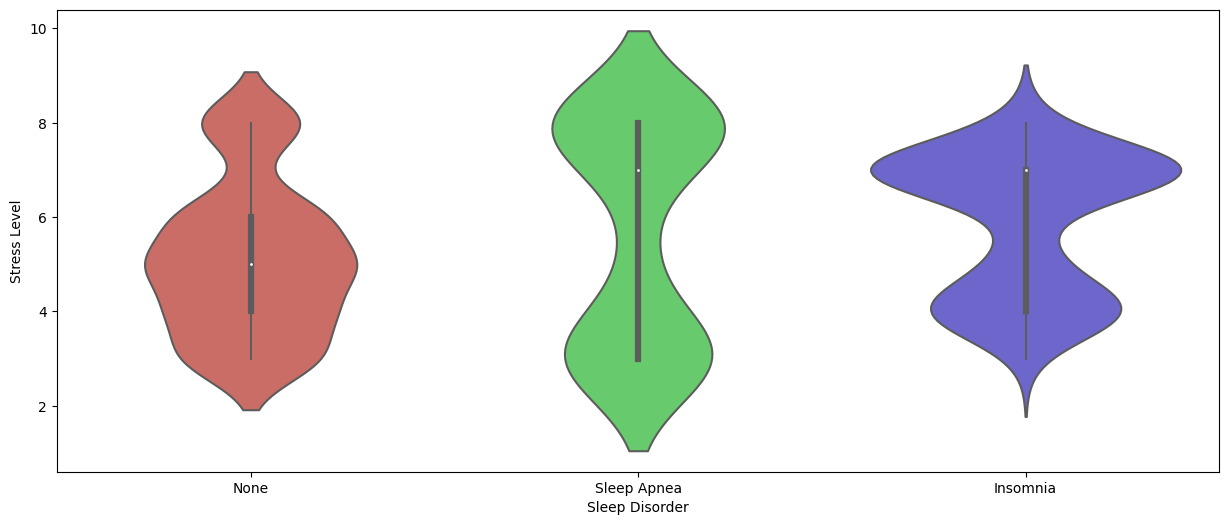

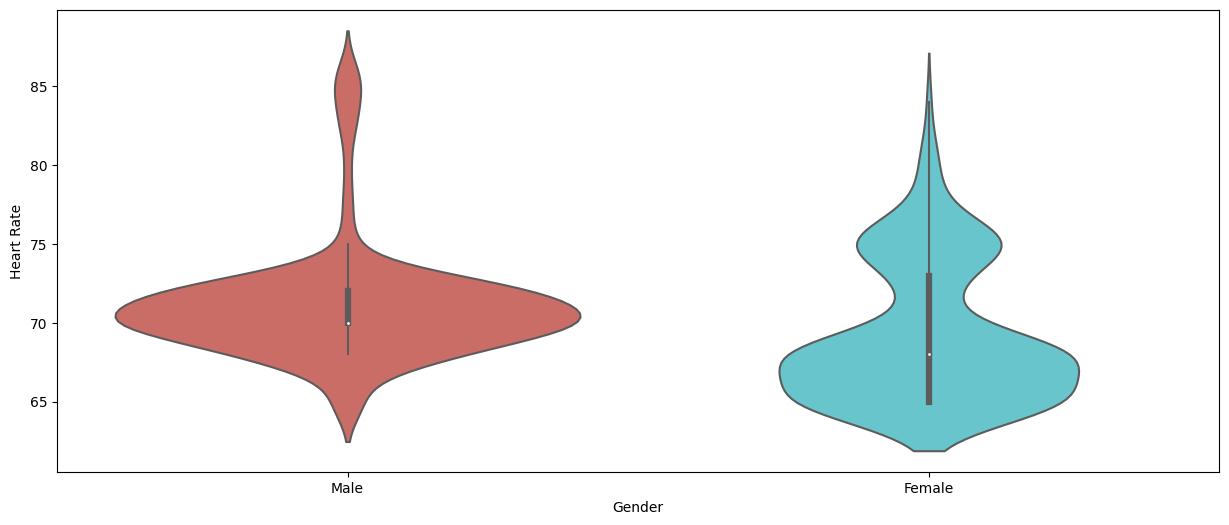

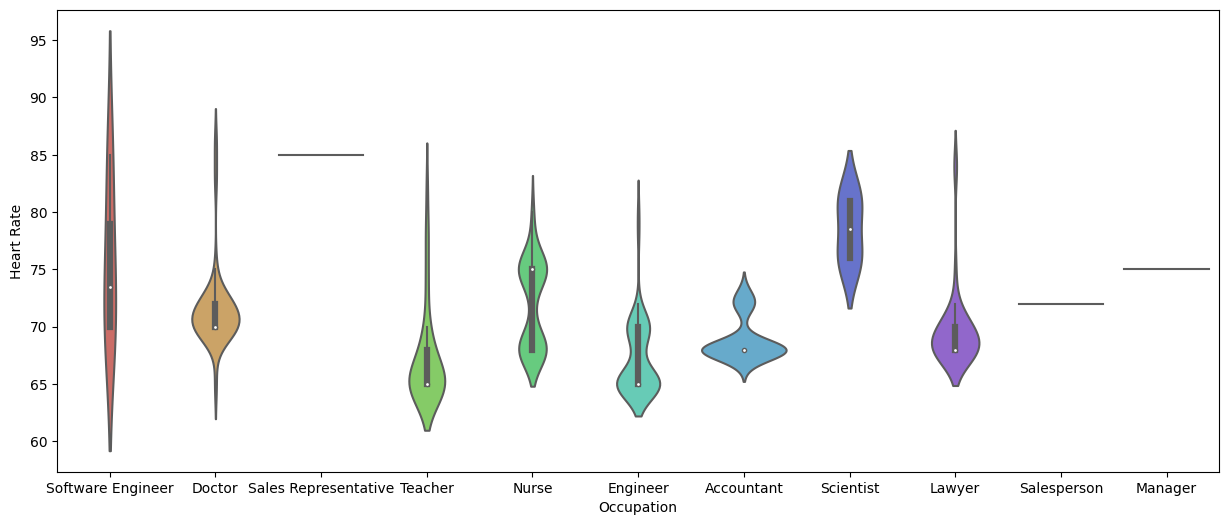

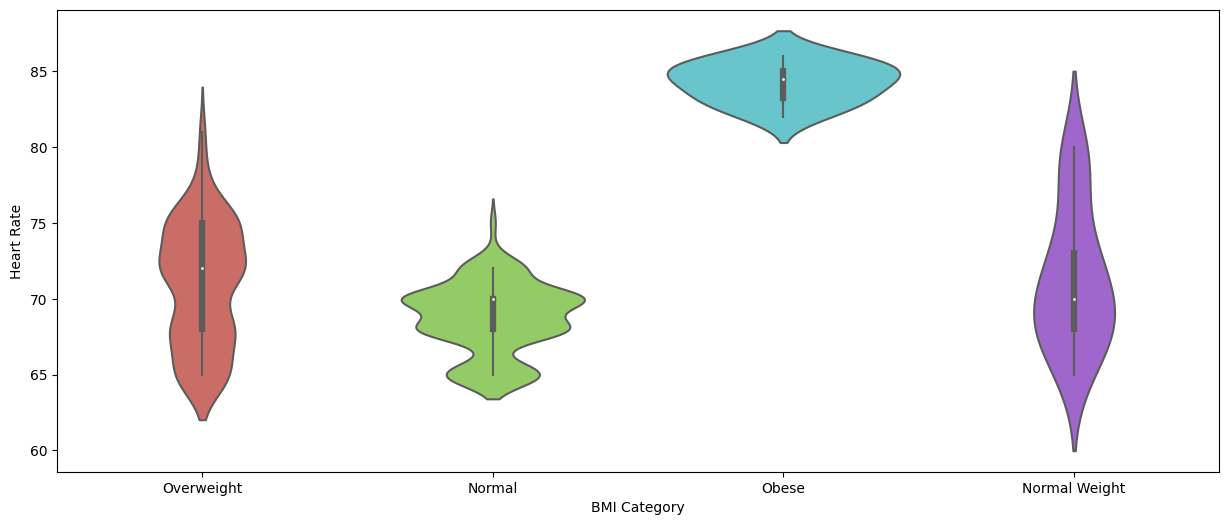

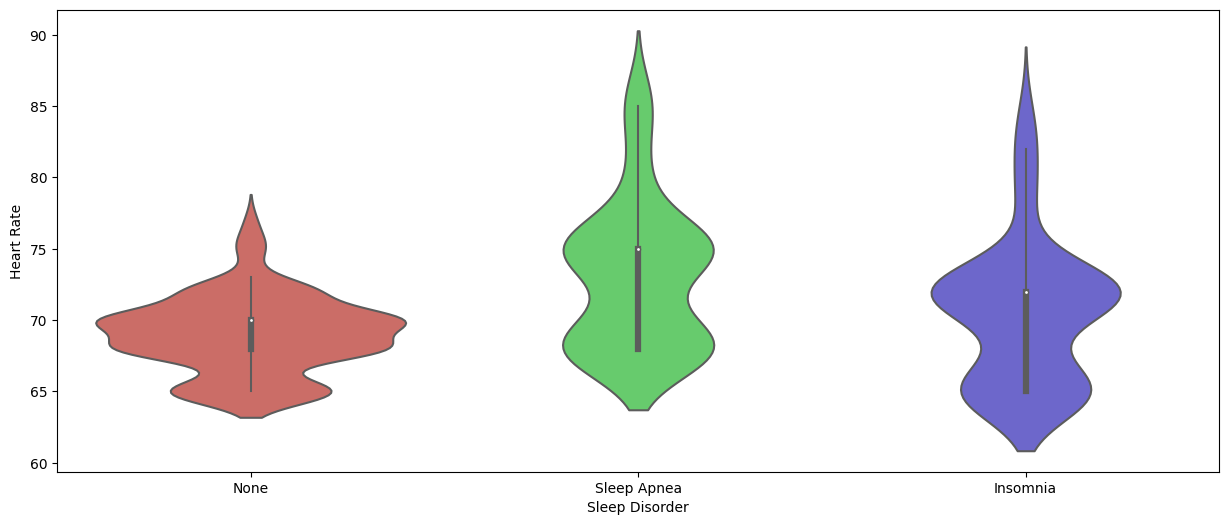

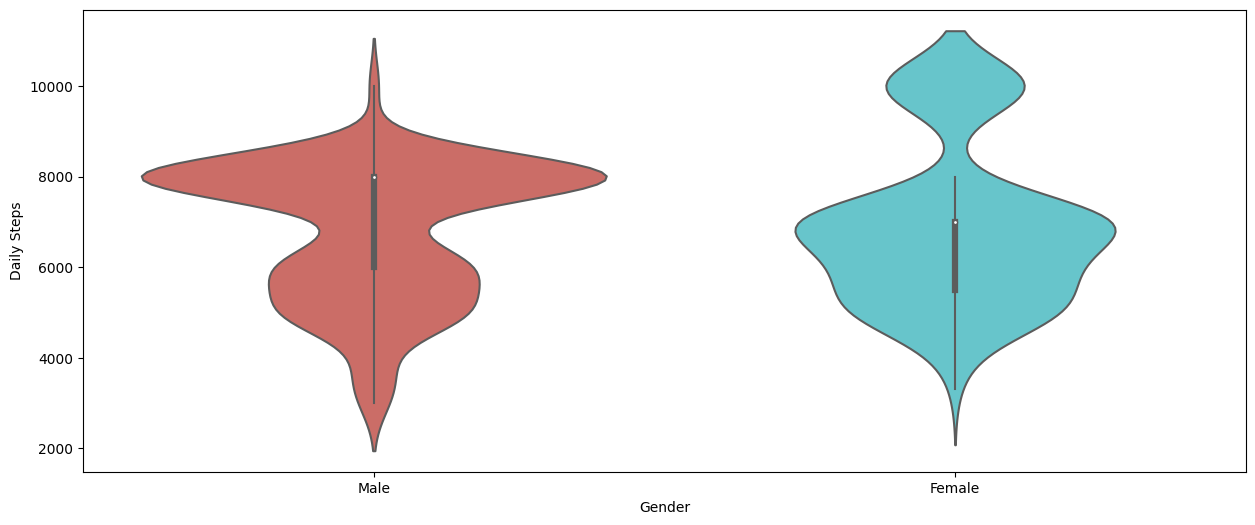

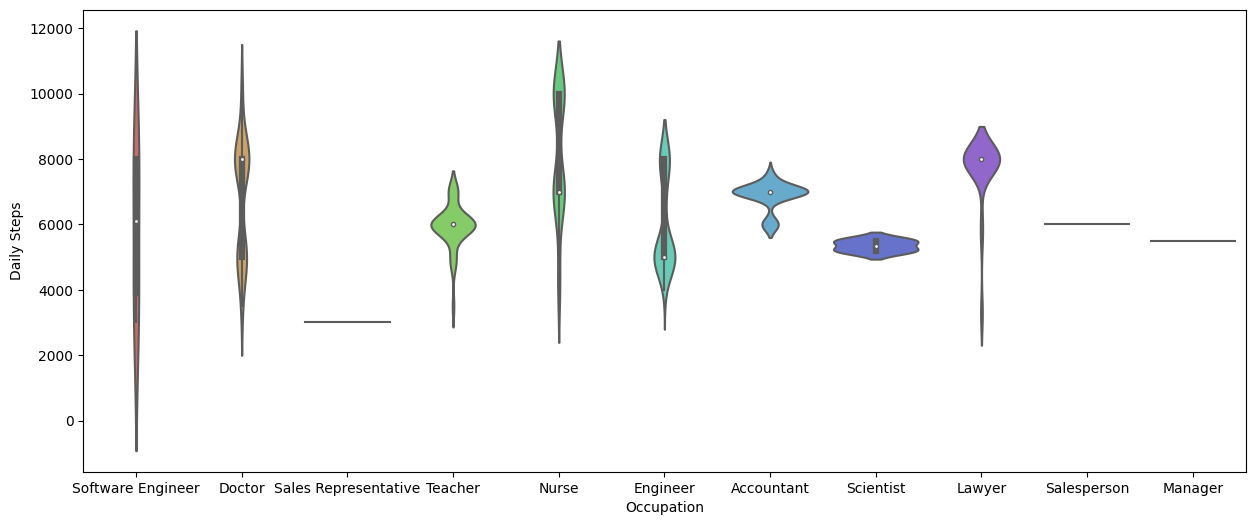

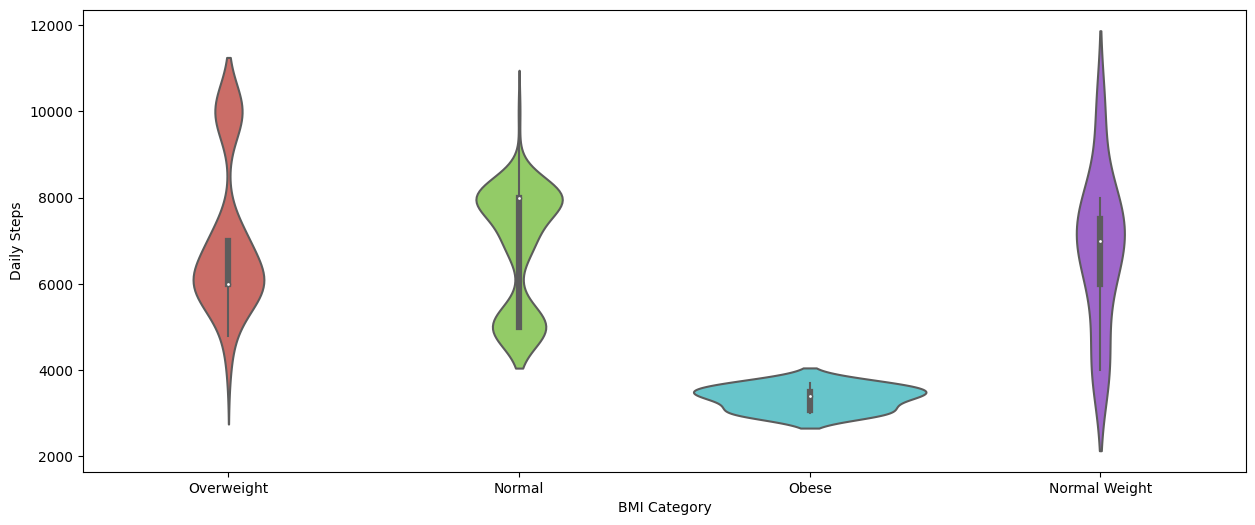

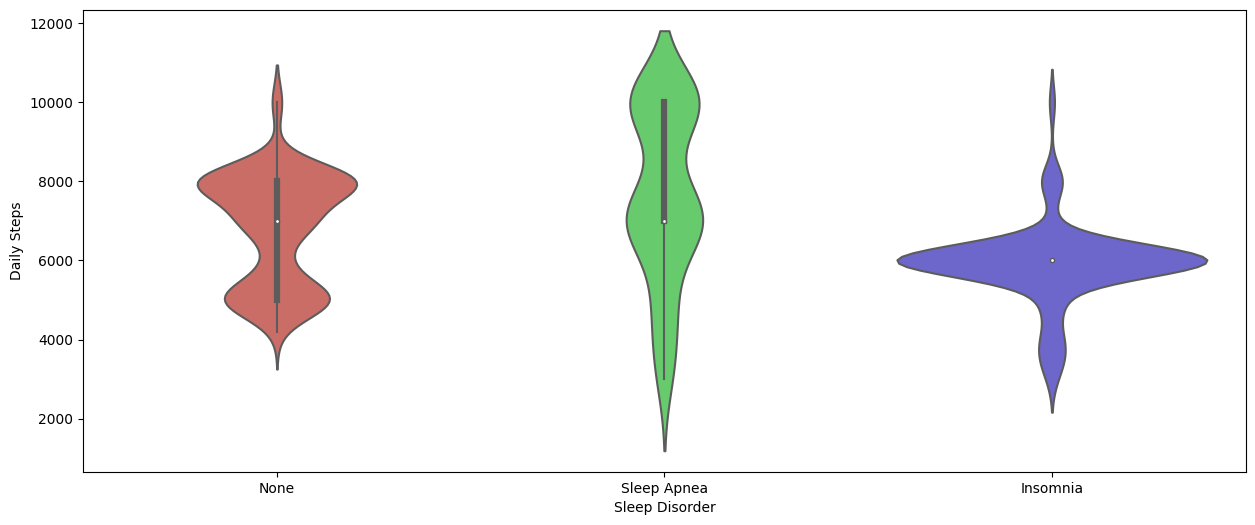

In [37]:
for i in numerical_columns:
    for j in object_columns:
        if i != 'Person ID' and j != 'Blood Pressure':
                plt.figure(figsize=(15,6))
                sns.violinplot(x = df[j], y = df[i], data = df, palette = 'hls')
                plt.show()

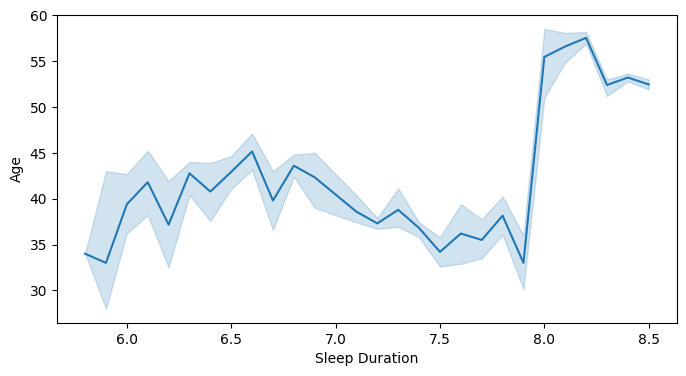

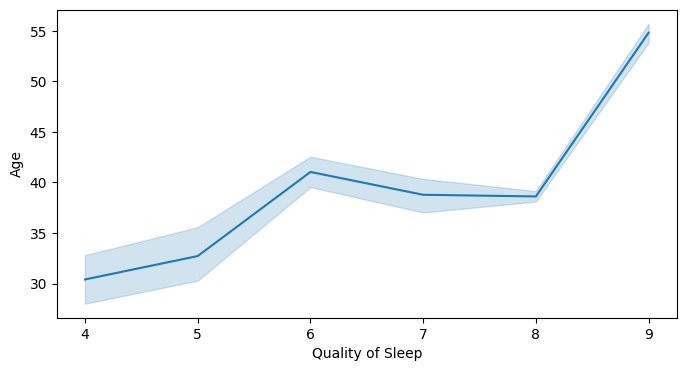

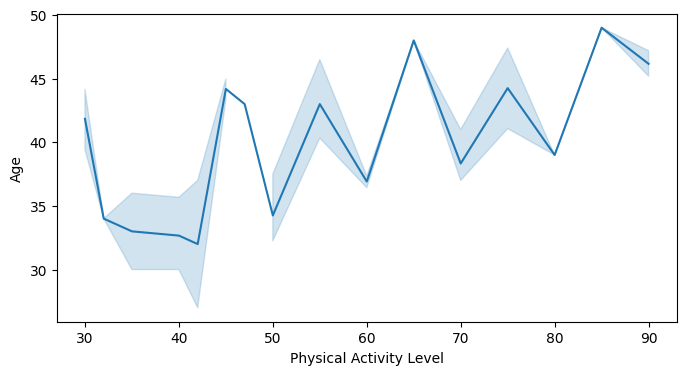

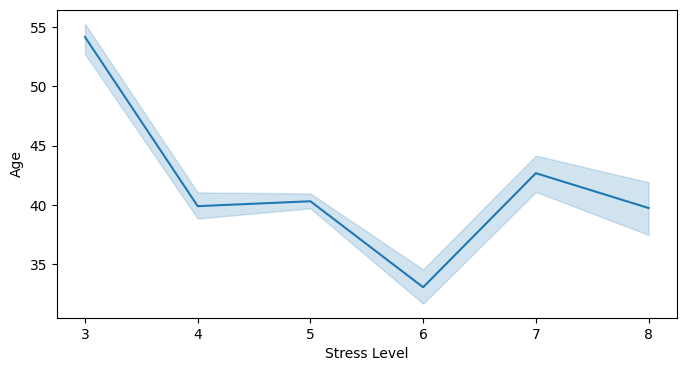

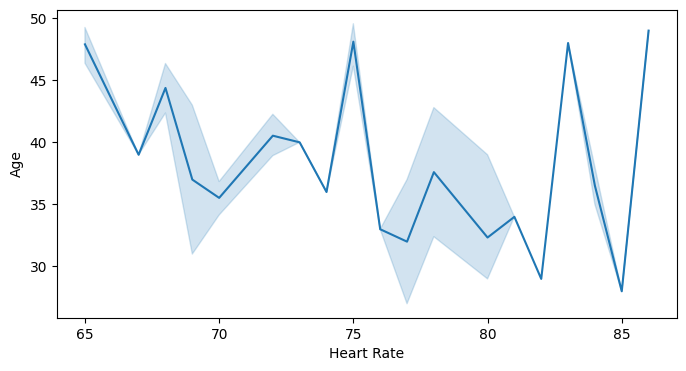

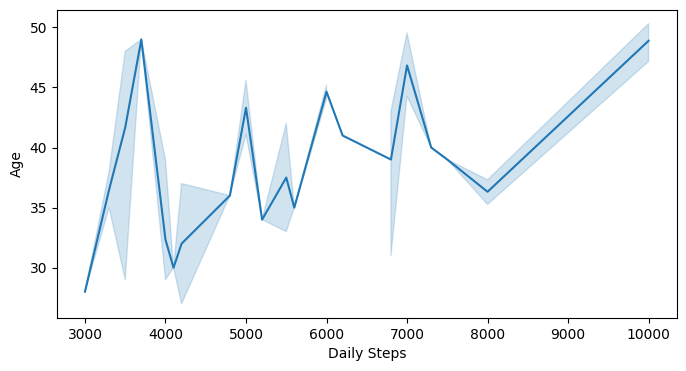

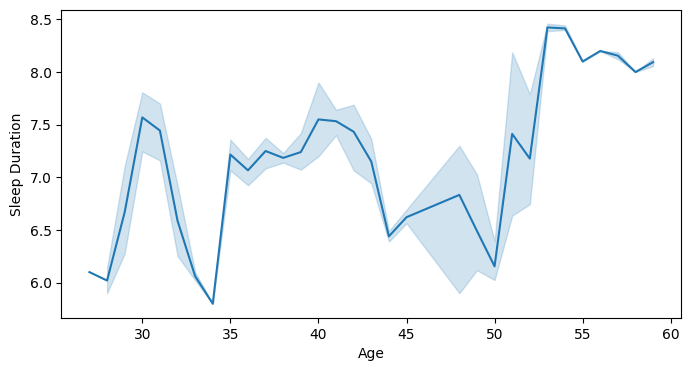

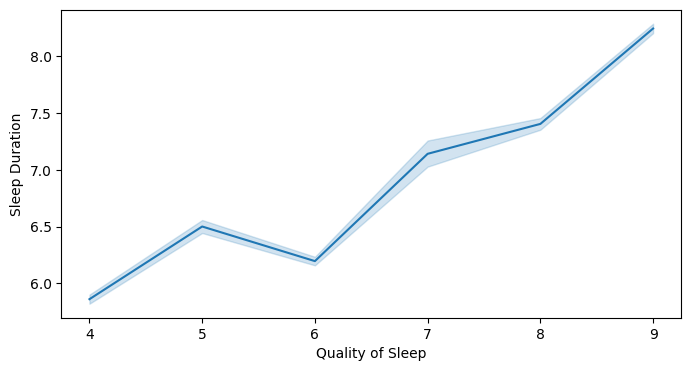

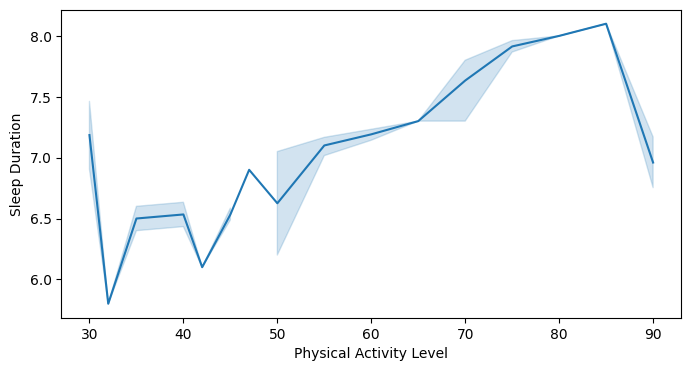

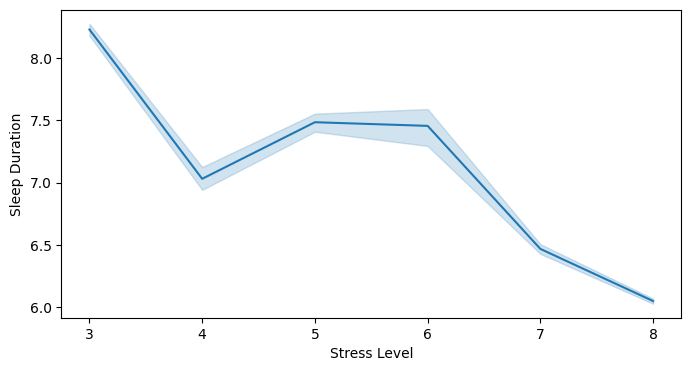

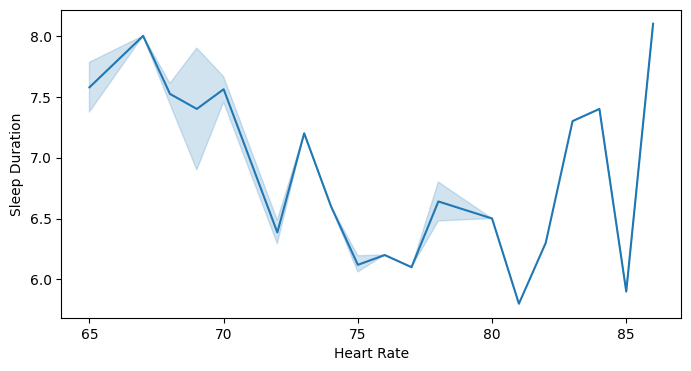

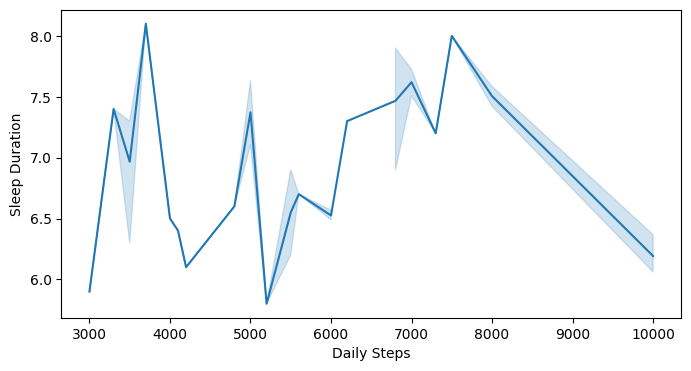

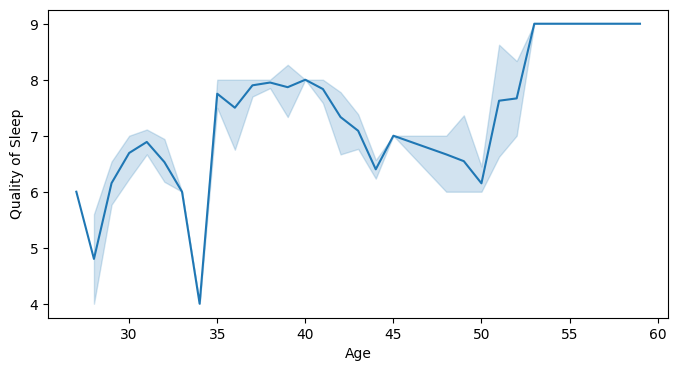

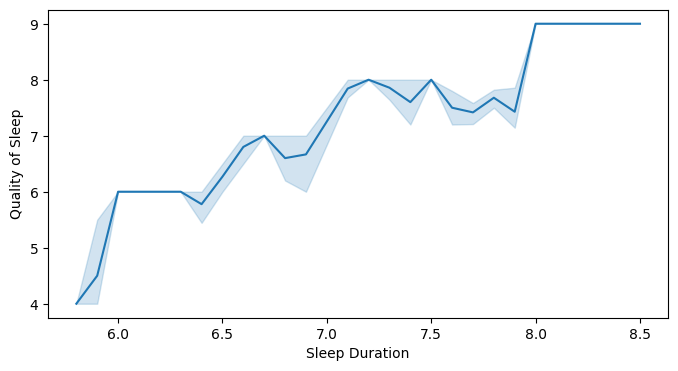

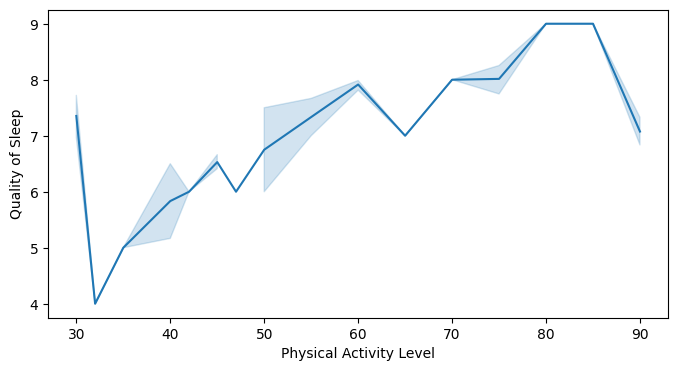

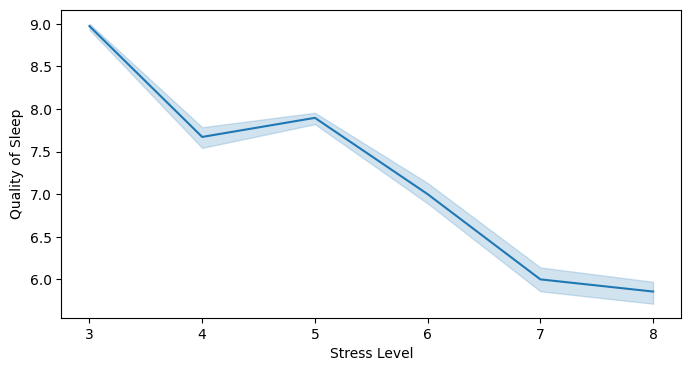

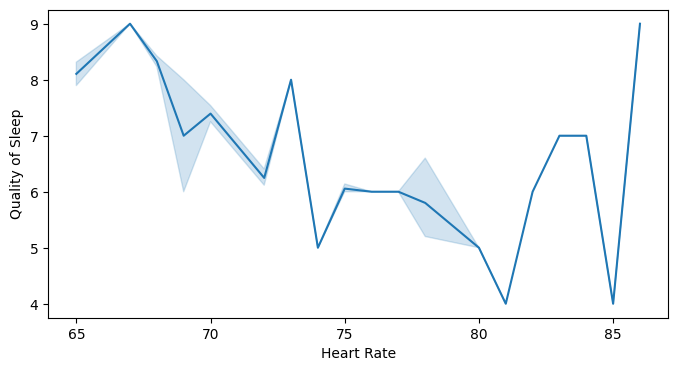

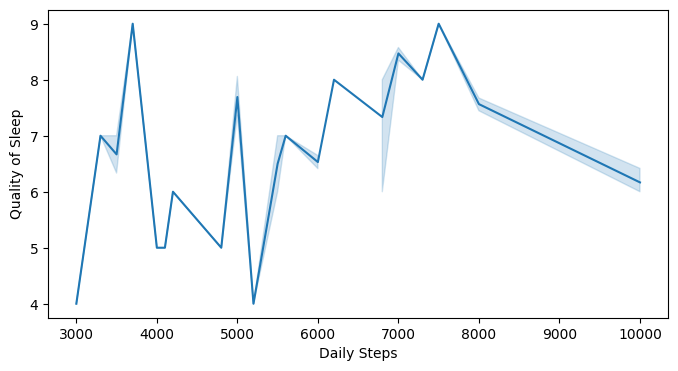

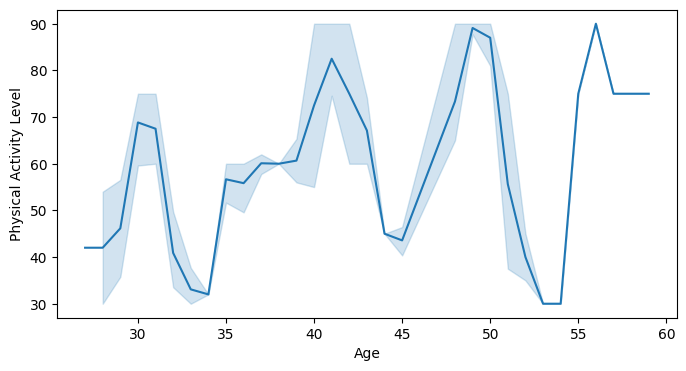

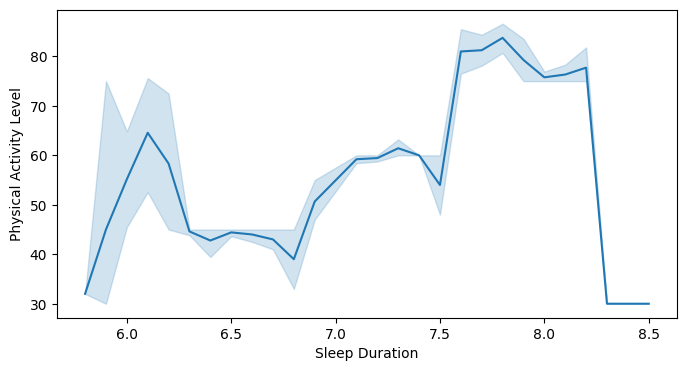

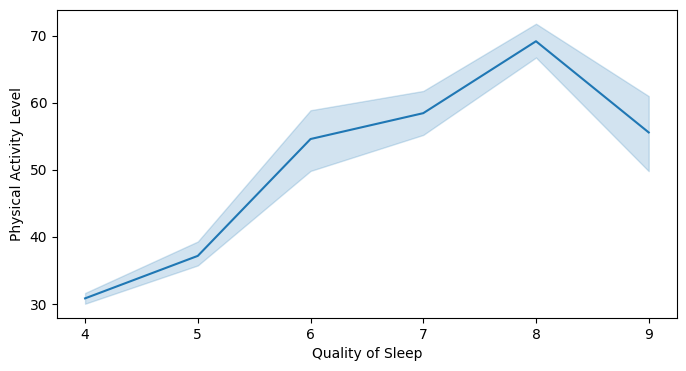

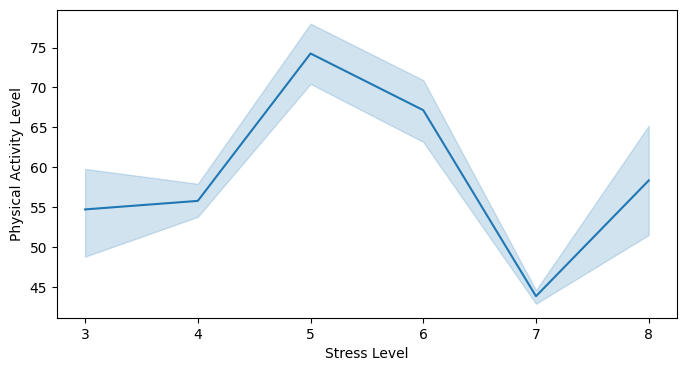

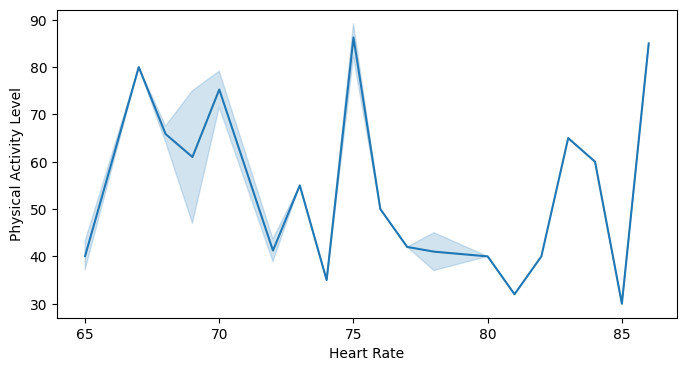

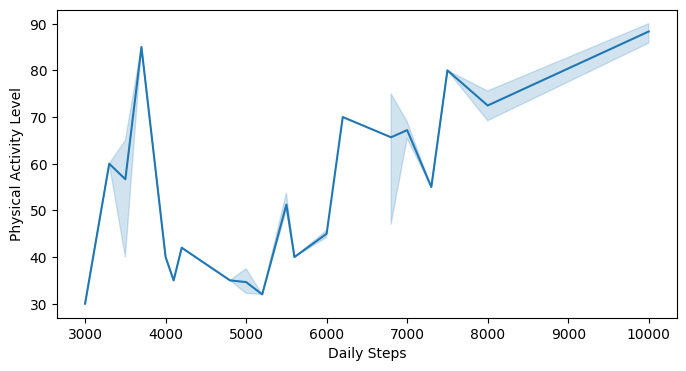

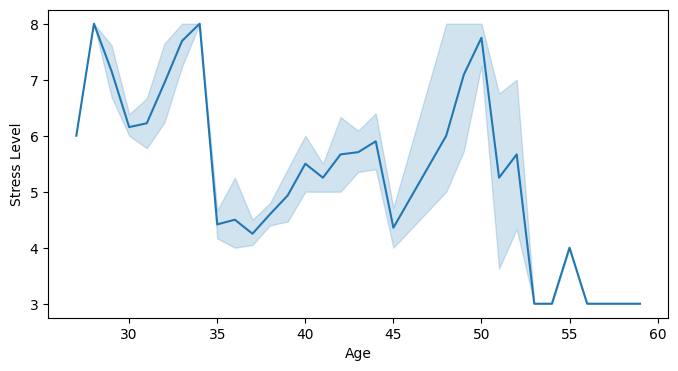

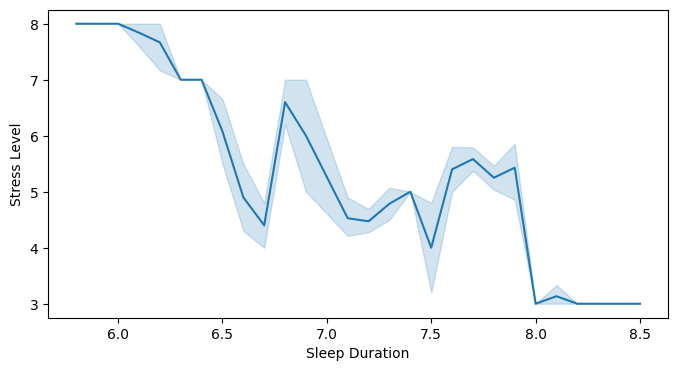

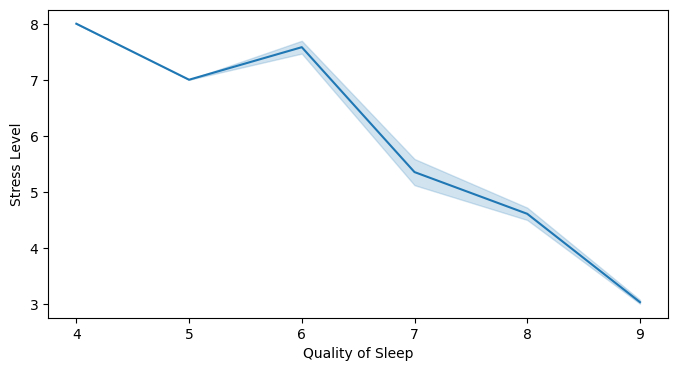

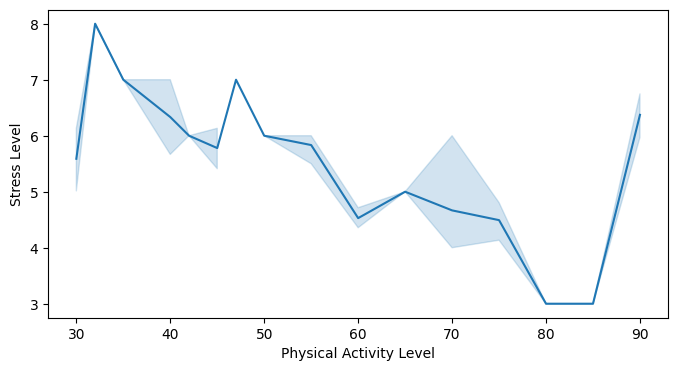

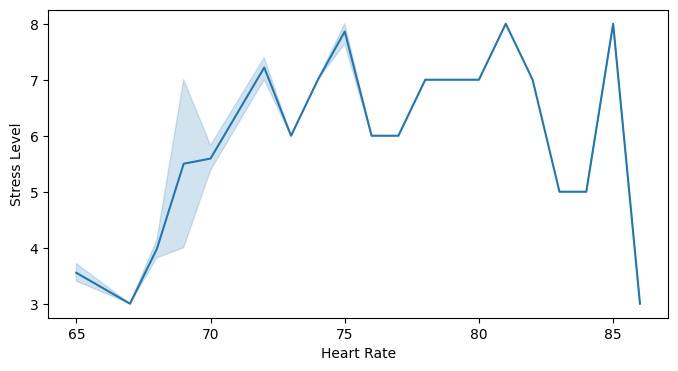

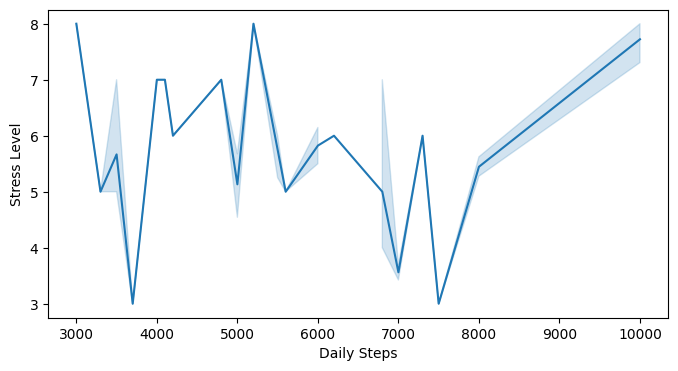

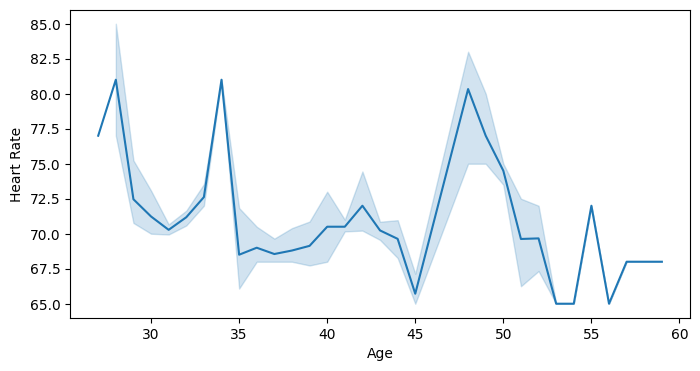

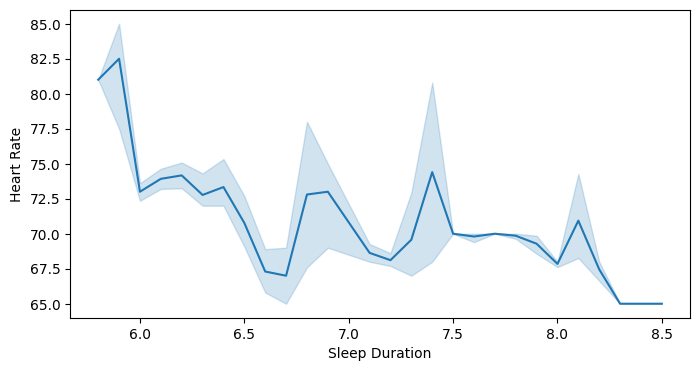

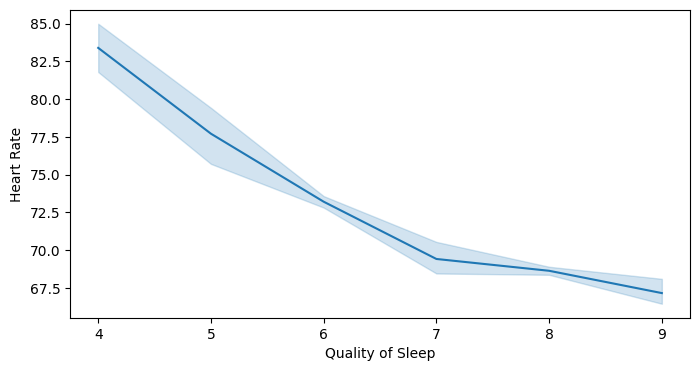

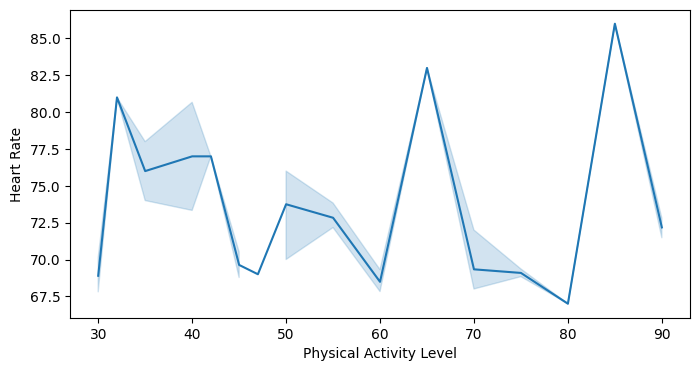

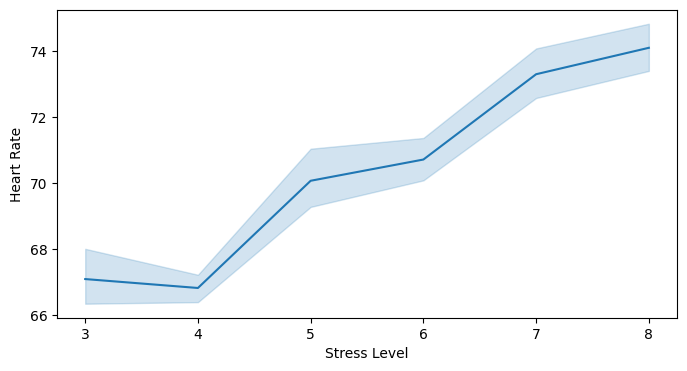

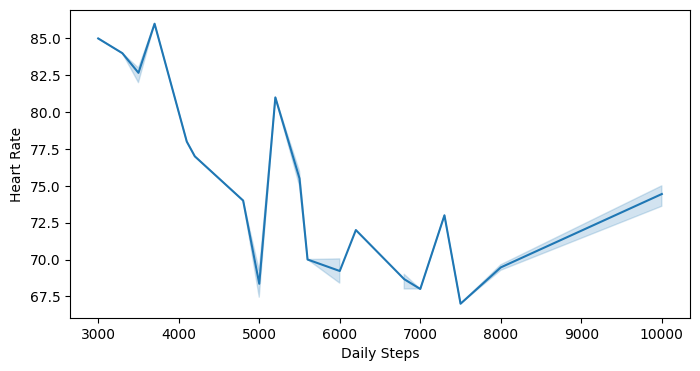

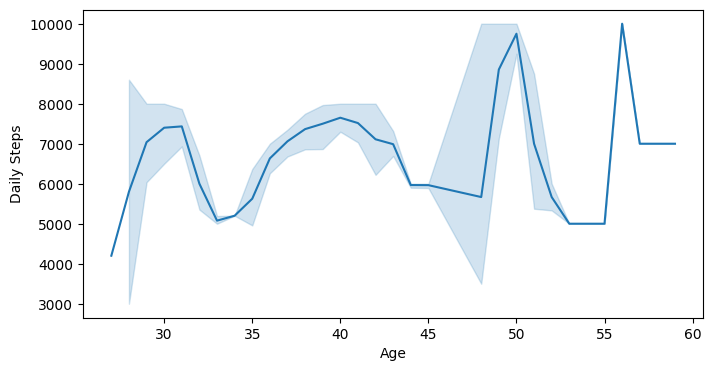

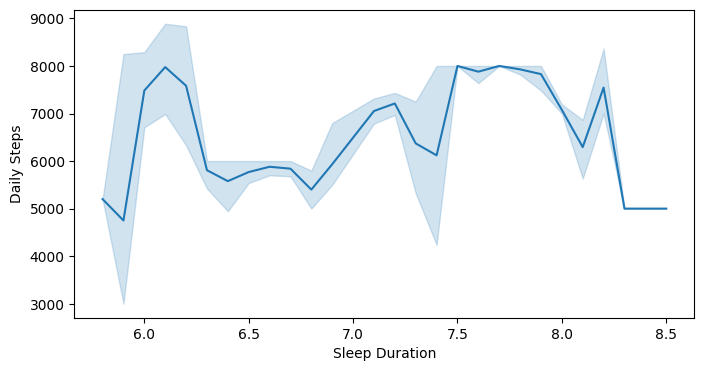

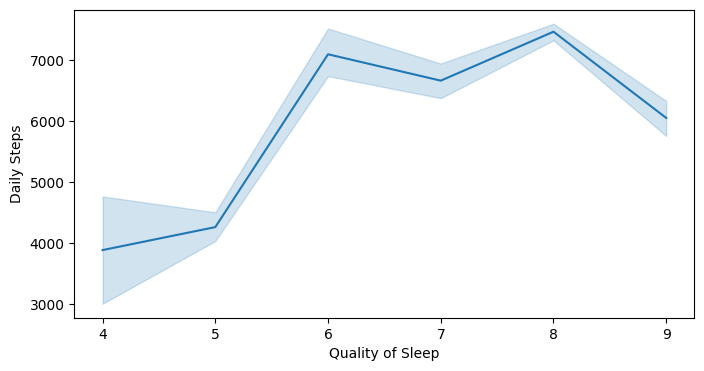

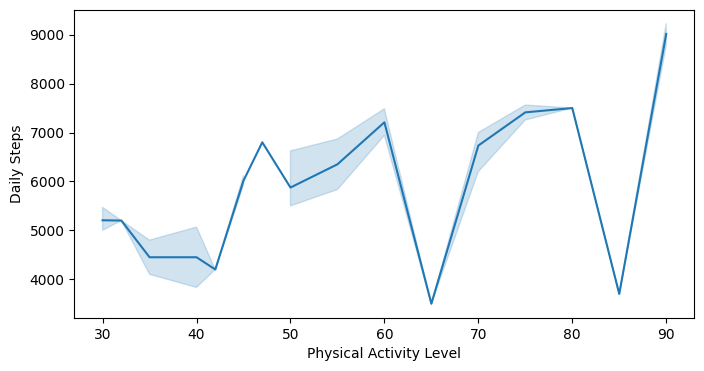

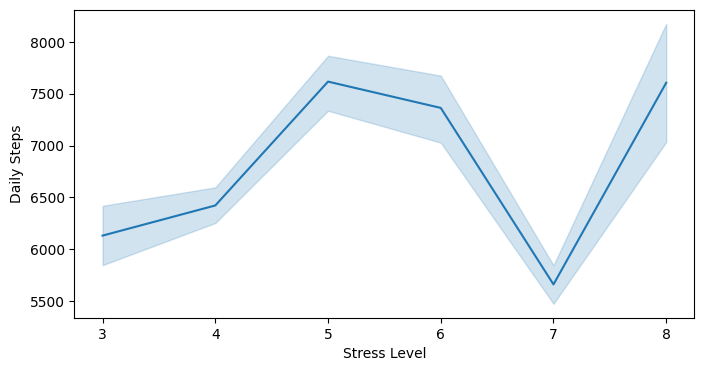

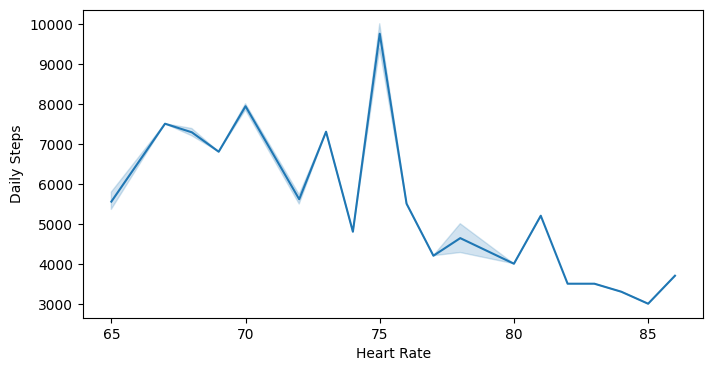

In [38]:
for i in numerical_columns:
    for j in numerical_columns:
        if i != 'Person ID' and j != 'Person ID':
            if i != j:
                plt.figure(figsize=(8,4))
                sns.lineplot(x = df[j], y = df[i], data = df)
                plt.show()

In [39]:
# IQR
# Calculate the upper and lower limits
Q1 = df['Heart Rate'].quantile(0.25)
Q3 = df['Heart Rate'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df['Heart Rate']>=upper)[0]
df = df.drop(index = upper_array)

In [40]:
# Create a copy of the DataFrame with only the selected columns
df_selected = df.copy()

In [41]:
df_selected = df_selected.drop(['Blood Pressure',], axis = 1)

In [42]:
# Encode categorical features using one-hot encoding
df_encoded = pd.get_dummies(df_selected, columns=['Gender', 'Occupation', 'BMI Category'], drop_first = True, dtype = int)

In [43]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 373
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           354 non-null    int64  
 1   Sleep Duration                354 non-null    float64
 2   Quality of Sleep              354 non-null    int64  
 3   Physical Activity Level       354 non-null    int64  
 4   Stress Level                  354 non-null    int64  
 5   Heart Rate                    354 non-null    int64  
 6   Daily Steps                   354 non-null    int64  
 7   Sleep Disorder                354 non-null    object 
 8   Systolic                      354 non-null    int64  
 9   Diastolic                     354 non-null    int64  
 10  Gender_Male                   354 non-null    int64  
 11  Occupation_Doctor             354 non-null    int64  
 12  Occupation_Engineer           354 non-null    int64  
 13  Occup

In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_encoded['Sleep Disorder'] = label_encoder.fit_transform(df_encoded['Sleep Disorder'])

In [45]:
df_encoded.columns

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'Systolic', 'Diastolic', 'Gender_Male', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Nurse', 'Occupation_Salesperson', 'Occupation_Scientist',
       'Occupation_Software Engineer', 'Occupation_Teacher',
       'BMI Category_Normal Weight', 'BMI Category_Overweight'],
      dtype='object')

In [46]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

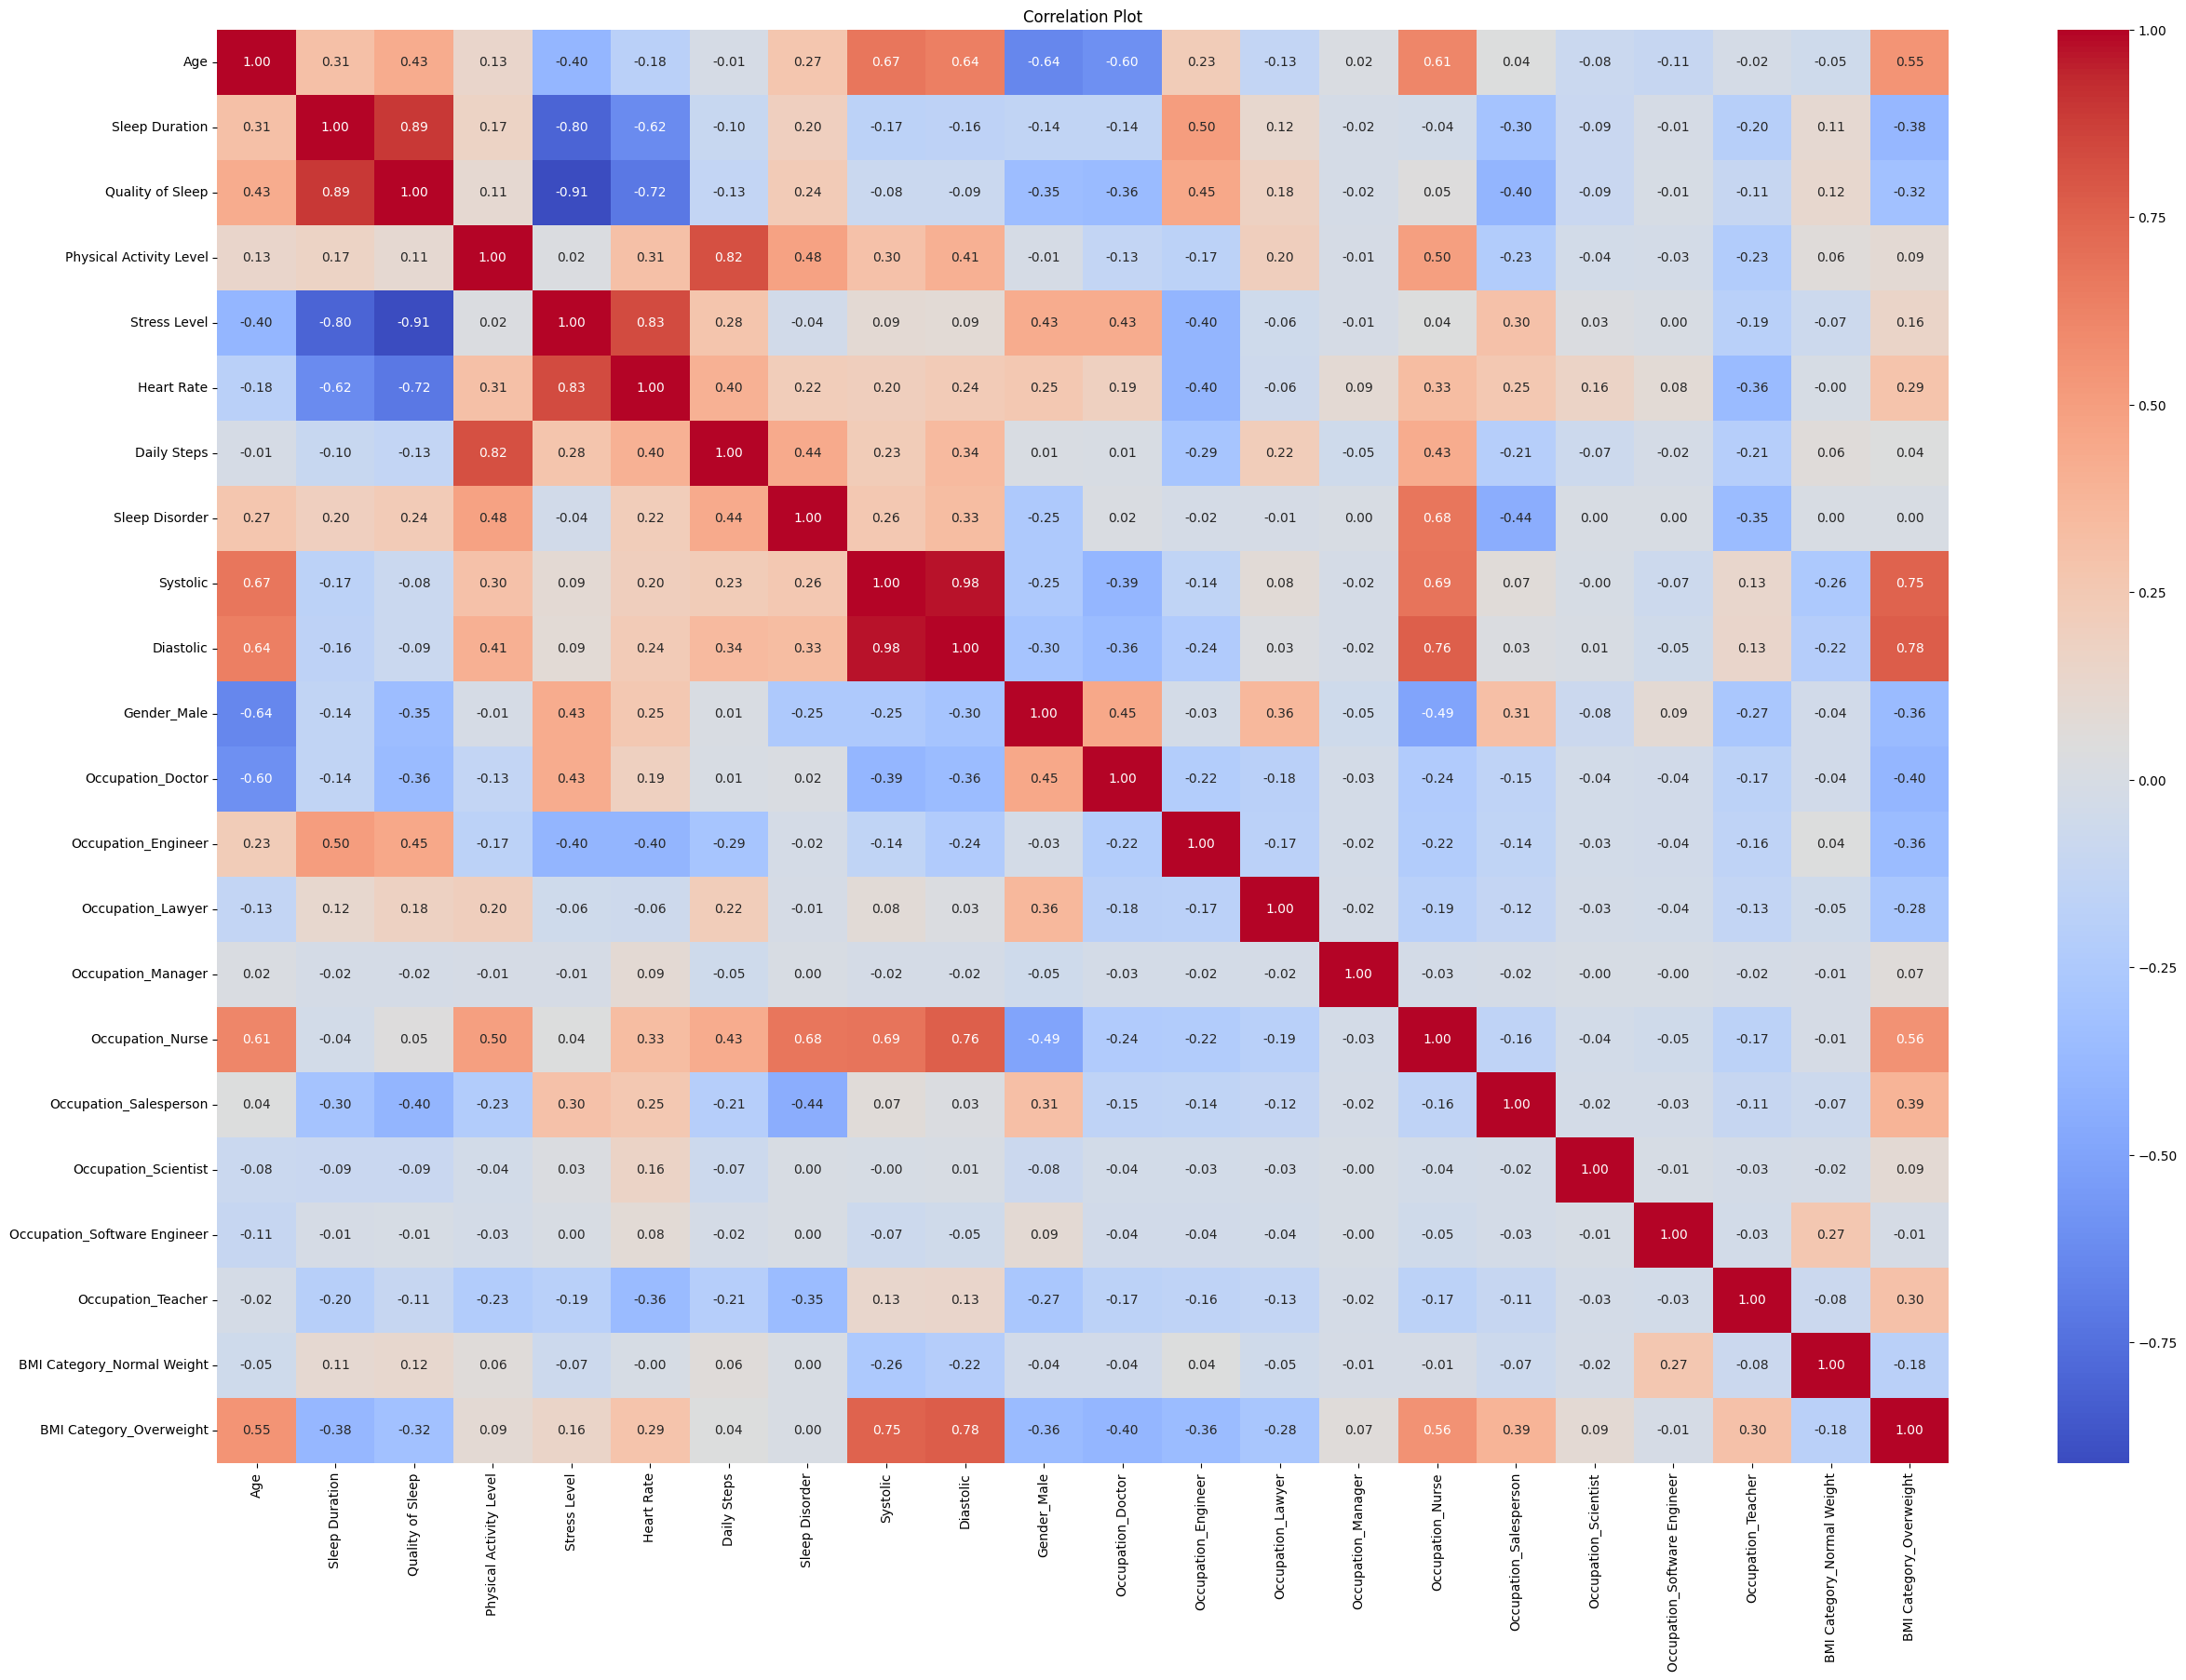

In [47]:
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

# 3. Modelling

In [48]:
X = df_encoded.drop('Sleep Disorder', axis=1)
y = df_encoded['Sleep Disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* LogisticRegression

In [50]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9295774647887324
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.97      0.93      0.95        41
           2       0.76      0.93      0.84        14

    accuracy                           0.93        71
   macro avg       0.91      0.93      0.92        71
weighted avg       0.94      0.93      0.93        71



* Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9577464788732394
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.98      0.98      0.98        41
           2       0.87      0.93      0.90        14

    accuracy                           0.96        71
   macro avg       0.95      0.95      0.95        71
weighted avg       0.96      0.96      0.96        71



* XGBClassifier

In [52]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9577464788732394
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.98      0.98      0.98        41
           2       0.87      0.93      0.90        14

    accuracy                           0.96        71
   macro avg       0.95      0.95      0.95        71
weighted avg       0.96      0.96      0.96        71



* RandomForest


In [53]:
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, random_state=42)

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy_rf)
report = classification_report(y_test, rf_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9577464788732394
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.98      0.98      0.98        41
           2       0.87      0.93      0.90        14

    accuracy                           0.96        71
   macro avg       0.95      0.95      0.95        71
weighted avg       0.96      0.96      0.96        71



* GradientBoostingClassifier

In [54]:
# gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, gb_pred)
print("Accuracy:", accuracy_gb)
report = classification_report(y_test, gb_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9577464788732394
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.98      0.98      0.98        41
           2       0.87      0.93      0.90        14

    accuracy                           0.96        71
   macro avg       0.95      0.95      0.95        71
weighted avg       0.96      0.96      0.96        71



* Feed Forward Neural Network

In [55]:
# Convert target variable to one-hot encoding
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)


# # Feed Forward Neural Network (FNN) model
# fnn_model = Sequential([
#     Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(3, activation='softmax')  # 3 classes: None, Insomnia, Sleep Apnea
# ])

fnn_model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(3, activation='softmax')
])



fnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# fnn_model.fit(X_train, y_train_encoded, epochs=50, batch_size=2, verbose=2)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
fnn_model.fit(X_train, y_train_encoded, epochs=50, batch_size=2, validation_data=(X_test, y_test_encoded), callbacks=[early_stopping], verbose=2)

# Evaluate models
fnn_pred_probs = fnn_model.predict(X_test)
# Extract the class with the highest probability for each prediction
fnn_pred = fnn_pred_probs.argmax(axis=1)
# Convert predictions to one-hot encoding for comparison
fnn_pred_encoded = to_categorical(fnn_pred)
# Evaluate the models
fnn_accuracy = accuracy_score(y_test_encoded, fnn_pred_encoded)
print(f'Feed Forward Neural Network (FNN) Accuracy: {fnn_accuracy}')

Epoch 1/50
142/142 - 2s - loss: 1.1152 - accuracy: 0.4982 - val_loss: 0.9590 - val_accuracy: 0.5493 - 2s/epoch - 14ms/step
Epoch 2/50
142/142 - 0s - loss: 0.7257 - accuracy: 0.7102 - val_loss: 0.9111 - val_accuracy: 0.6901 - 299ms/epoch - 2ms/step
Epoch 3/50
142/142 - 0s - loss: 0.6661 - accuracy: 0.7527 - val_loss: 0.8867 - val_accuracy: 0.8451 - 328ms/epoch - 2ms/step
Epoch 4/50
142/142 - 0s - loss: 0.6946 - accuracy: 0.7420 - val_loss: 1.0053 - val_accuracy: 0.7324 - 326ms/epoch - 2ms/step
Epoch 5/50
142/142 - 0s - loss: 0.5856 - accuracy: 0.8127 - val_loss: 0.8195 - val_accuracy: 0.8310 - 300ms/epoch - 2ms/step
Epoch 6/50
142/142 - 0s - loss: 0.6487 - accuracy: 0.7845 - val_loss: 0.8890 - val_accuracy: 0.7324 - 317ms/epoch - 2ms/step
Epoch 7/50
142/142 - 0s - loss: 0.6076 - accuracy: 0.7951 - val_loss: 0.9601 - val_accuracy: 0.6761 - 325ms/epoch - 2ms/step
Epoch 8/50
142/142 - 0s - loss: 0.6757 - accuracy: 0.7880 - val_loss: 1.1251 - val_accuracy: 0.6056 - 313ms/epoch - 2ms/step
Ep

* Recurrent Neural Network (RNN)

In [56]:
# Recurrent Neural Network (RNN) model with LSTM layer
X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])  # reshape for RNN
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# rnn_model = Sequential([
#     LSTM(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
#     Dense(3, activation='softmax')  # 3 classes: None, Insomnia, Sleep Apnea
# ])

# Thêm lớp Masking vào mô hình RNN
rnn_model = Sequential([
    Masking(mask_value=-1, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    LSTM(50),
    Dense(3, activation='softmax')
])

rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train_rnn, y_train_encoded, epochs=50, batch_size=2, verbose=2)

rnn_pred_probs = rnn_model.predict(X_test_rnn)
rnn_pred = rnn_pred_probs.argmax(axis=1)
rnn_pred_encoded = to_categorical(rnn_pred)
rnn_accuracy = accuracy_score(y_test_encoded, rnn_pred_encoded)
print(f'Recurrent Neural Network (RNN) Accuracy: {rnn_accuracy}')

Epoch 1/50
142/142 - 6s - loss: 0.7778 - accuracy: 0.8551 - 6s/epoch - 42ms/step
Epoch 2/50
142/142 - 0s - loss: 0.4235 - accuracy: 0.9117 - 311ms/epoch - 2ms/step
Epoch 3/50
142/142 - 0s - loss: 0.3503 - accuracy: 0.9187 - 343ms/epoch - 2ms/step
Epoch 4/50
142/142 - 0s - loss: 0.3338 - accuracy: 0.9223 - 322ms/epoch - 2ms/step
Epoch 5/50
142/142 - 0s - loss: 0.3247 - accuracy: 0.9223 - 307ms/epoch - 2ms/step
Epoch 6/50
142/142 - 0s - loss: 0.3204 - accuracy: 0.9223 - 329ms/epoch - 2ms/step
Epoch 7/50
142/142 - 0s - loss: 0.3163 - accuracy: 0.9223 - 319ms/epoch - 2ms/step
Epoch 8/50
142/142 - 0s - loss: 0.3119 - accuracy: 0.9223 - 324ms/epoch - 2ms/step
Epoch 9/50
142/142 - 0s - loss: 0.3113 - accuracy: 0.9223 - 363ms/epoch - 3ms/step
Epoch 10/50
142/142 - 0s - loss: 0.3078 - accuracy: 0.9223 - 319ms/epoch - 2ms/step
Epoch 11/50
142/142 - 0s - loss: 0.3053 - accuracy: 0.9223 - 313ms/epoch - 2ms/step
Epoch 12/50
142/142 - 0s - loss: 0.3044 - accuracy: 0.9223 - 328ms/epoch - 2ms/step
Epo